In [1]:
from analysis.analyze_results import *
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from collections import defaultdict

In [2]:
# output_base_folder = Path("/home/ivan/Documents/git/storage-benchmarking/src/benchmark_output")
output_base_folder = Path("/iarai/home/ivan.svogor/git/storage-benchmarking/src/benchmark_output")

In [3]:
s3_folder_filter="1711-justfetch/s3/*benchmark_e2e*"
scratch_folder_filter="1711-justfetch/scratch/*benchmark_e2e*"
# s3_folder_filter="2810/*benchmark_e2e*"

In [4]:
def extract_timelines(output_base_folder: Path, folder_filter: str = "**", filter_by_metadata: Dict[str, List[str]] = None,
):
    files = list(output_base_folder.rglob(f"{folder_filter}/timeline-*.log"))
    data = []
    for working_file_path in tqdm.tqdm(files, total=len(files)):
        results = parse_results_log(working_file_path)
        if len(results) == 0:
            continue
        results = pd.DataFrame.from_records(data=results)
        results = pd.merge(results[results["end_time"].isnull()], 
                           results[results["start_time"].isnull()], 
                           left_on='id', 
                           right_on='id').drop(['end_time_x', 'start_time_y'], axis=1)
        results["source_file"] = working_file_path
        results["run"] = working_file_path.parent.name
        # filter out old data format missing dataset etc.
        data.append(results)
    df = pd.concat(data)
    df.groupby
    return df


In [5]:
def show_timelines(df, run, flat=False, zoom=False, zoom_epochs = 1):
    fig, ax = plt.subplots(figsize=(30, 20))
    # fig, ax = plt.subplots()
    data = defaultdict(list)
    start = min(df["start_time_x"]) 
    end = max(df["end_time_y"])
    
    total_runtime = (end - start)
    number_of_epochs = 20
    
    if zoom:
        df = df[df["start_time_x"] < start+((total_runtime / number_of_epochs) * zoom_epochs)]
    
    i = 0
    for index, row in df.sort_values(["start_time_x"], ascending=True).iterrows():
        duration = row["end_time_y"] - row["start_time_x"] 
        x1 = row["start_time_x"] - start 
        if duration < 0.08:
            duration = 0.1
        x2 = x1 + duration
        if not flat:
            lane = i
            i += 1
        else:
            lane = lanes[row["item_x"]]
        ax.plot([x1, x2], [lane, lane], color=colors[row["item_x"]], label=row["item_x"], linewidth=1)
    ax.set_xlabel("Experiment duration", loc="center")
    ax.set_ylabel("Item", loc="top")
    # print(run.split('_'))
    # ['20211109f152412', 'benchmark', 'e2e', 'lightning', 's3', '256', '4', '16', '1', 'vanilla', 'sync']
    filename = run.split('_')
    ax.set_title(f"Runtime for each function, impl: {filename[9]},"
                 f" cache: {filename[8]}, "
                 f" batch size: {filename[5]}, "
                 f" lib: {filename[3]}",
                 loc='center')
    ax.legend()
    ax.grid(linestyle='--', which="both")

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))

    # Put a legend below current axis
    ax.legend(by_label.values(), by_label.keys(), 
              loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=5)
    plt.show()


In [ ]:
df_dataloader_s3 = extract_timelines(output_base_folder, folder_filter=s3_folder_filter)
df_dataloader_scratch = extract_timelines(output_base_folder, folder_filter=scratch_folder_filter)

In [7]:
df_dataloader_s3.sort_values(["start_time_x"], ascending=False)

item_x            id  start_time_x  \
1411        run_training_batch  6.794546e+18  1.637229e+09   
1410  training_batch_to_device  4.947615e+16  1.637229e+09   
1409                 next_data  4.690000e+02  1.637229e+09   
1408        run_training_batch  3.492927e+18  1.637229e+09   
1407  training_batch_to_device  8.726375e+18  1.637229e+09   
...                        ...           ...           ...   
0                        batch  1.637223e+09  1.637223e+09   
0                        batch  1.637223e+09  1.637223e+09   
1                        batch  1.637223e+09  1.637223e+09   
0                        batch  1.637223e+09  1.637223e+09   
0                        batch  1.637223e+09  1.637223e+09   

                        item_y    end_time_y  \
1411        run_training_batch  1.637229e+09   
1410  training_batch_to_device  1.637229e+09   
1409                 next_data  1.637229e+09   
1408        run_training_batch  1.637229e+09   
1407  training_batch_to_device  1.637229e+09   
...                        ...           ...   
0                        batch  1.637223e+09   
0                        batch  1.637223e+09   
1                        batch  1.637223e+09   
0                        batch  1.637223e+09   
0                        batch  1.637223e+09   

                                            source_file  \
1411  /iarai/home/ivan.svogor/git/storage-benchmarki...   
1410  /iarai/home/ivan.svogor/git/storage-benchmarki...   
1409  /iarai/home/ivan.svogor/git/storage-benchmarki...   
1408  /iarai/home/ivan.svogor/git/storage-benchmarki...   
1407  /iarai/home/ivan.svogor/git/storage-benchmarki...   
...                                                 ...   
0     /iarai/home/ivan.svogor/git/storage-benchmarki...   
0     /iarai/home/ivan.svogor/git/storage-benchmarki...   
1     /iarai/home/ivan.svogor/git/storage-benchmarki...   
0     /iarai/home/ivan.svogor/git/storage-benchmarki...   
0     /iarai/home/ivan.svogor/git/storage-benchmarki...   

                                                    run  
1411  20211118f095518_benchmark_e2e_lightning_s3_64_...  
1410  20211118f095518_benchmark_e2e_lightning_s3_64_...  
1409  20211118f095518_benchmark_e2e_lightning_s3_64_...  
1408  20211118f095518_benchmark_e2e_lightning_s3_64_...  
1407  20211118f095518_benchmark_e2e_lightning_s3_64_...  
...                                                 ...  
0     20211118f090621_benchmark_e2e_torch_s3_64_4_16...  
0     20211118f090621_benchmark_e2e_torch_s3_64_4_16...  
1     20211118f090621_benchmark_e2e_torch_s3_64_4_16...  
0     20211118f090621_benchmark_e2e_torch_s3_64_4_16...  
0     20211118f090621_benchmark_e2e_torch_s3_64_4_16...  

[11296 rows x 7 columns]

In [8]:
df_dataloader_scratch.sort_values(["start_time_x"], ascending=False)

item_x            id  start_time_x  \
1417        run_training_batch  5.418368e+18  1.637230e+09   
1416  training_batch_to_device  1.876188e+18  1.637230e+09   
1415                 next_data  4.690000e+02  1.637230e+09   
1414        run_training_batch  3.911936e+18  1.637230e+09   
1413  training_batch_to_device  2.205539e+18  1.637230e+09   
...                        ...           ...           ...   
0                        batch  1.637224e+09  1.637224e+09   
0                        batch  1.637224e+09  1.637224e+09   
1                        batch  1.637224e+09  1.637224e+09   
0                        batch  1.637224e+09  1.637224e+09   
0                        batch  1.637224e+09  1.637224e+09   

                        item_y    end_time_y  \
1417        run_training_batch  1.637230e+09   
1416  training_batch_to_device  1.637230e+09   
1415                 next_data  1.637230e+09   
1414        run_training_batch  1.637230e+09   
1413  training_batch_to_device  1.637230e+09   
...                        ...           ...   
0                        batch  1.637224e+09   
0                        batch  1.637224e+09   
1                        batch  1.637224e+09   
0                        batch  1.637224e+09   
0                        batch  1.637224e+09   

                                            source_file  \
1417  /iarai/home/ivan.svogor/git/storage-benchmarki...   
1416  /iarai/home/ivan.svogor/git/storage-benchmarki...   
1415  /iarai/home/ivan.svogor/git/storage-benchmarki...   
1414  /iarai/home/ivan.svogor/git/storage-benchmarki...   
1413  /iarai/home/ivan.svogor/git/storage-benchmarki...   
...                                                 ...   
0     /iarai/home/ivan.svogor/git/storage-benchmarki...   
0     /iarai/home/ivan.svogor/git/storage-benchmarki...   
1     /iarai/home/ivan.svogor/git/storage-benchmarki...   
0     /iarai/home/ivan.svogor/git/storage-benchmarki...   
0     /iarai/home/ivan.svogor/git/storage-benchmarki...   

                                                    run  
1417  20211118f105735_benchmark_e2e_lightning_scratc...  
1416  20211118f105735_benchmark_e2e_lightning_scratc...  
1415  20211118f105735_benchmark_e2e_lightning_scratc...  
1414  20211118f105735_benchmark_e2e_lightning_scratc...  
1413  20211118f105735_benchmark_e2e_lightning_scratc...  
...                                                 ...  
0     20211118f092349_benchmark_e2e_torch_scratch_64...  
0     20211118f092349_benchmark_e2e_torch_scratch_64...  
1     20211118f092349_benchmark_e2e_torch_scratch_64...  
0     20211118f092349_benchmark_e2e_torch_scratch_64...  
0     20211118f092349_benchmark_e2e_torch_scratch_64...  

[11298 rows x 7 columns]

In [9]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [10]:
unique_functions_s3 = np.unique(df_dataloader_s3["item_x"])
print(f"Unique functions: {unique_functions_s3}")

colors = {}
for i, color in zip(unique_functions_s3, ["red", "gold", "blue", "magenta", "aqua"]):
    colors[str(i)] = color
lanes={}
for i, lane in zip(unique_functions_s3, range(len(unique_functions_s3))):
    lanes[str(i)] = lane
    
print(f"Lanes: {lanes}")
    
#df_dataloader = extract_timelines(output_base_folder, folder_filter=s3_folder_filter)

unique_runs_s3 = np.unique(df_dataloader_s3["run"])
unique_runs_scratch = np.unique(df_dataloader_scratch["run"])

Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']
Lanes: {'batch': 0, 'next_data': 1, 'run_training_batch': 2, 'training_batch_to_device': 3}


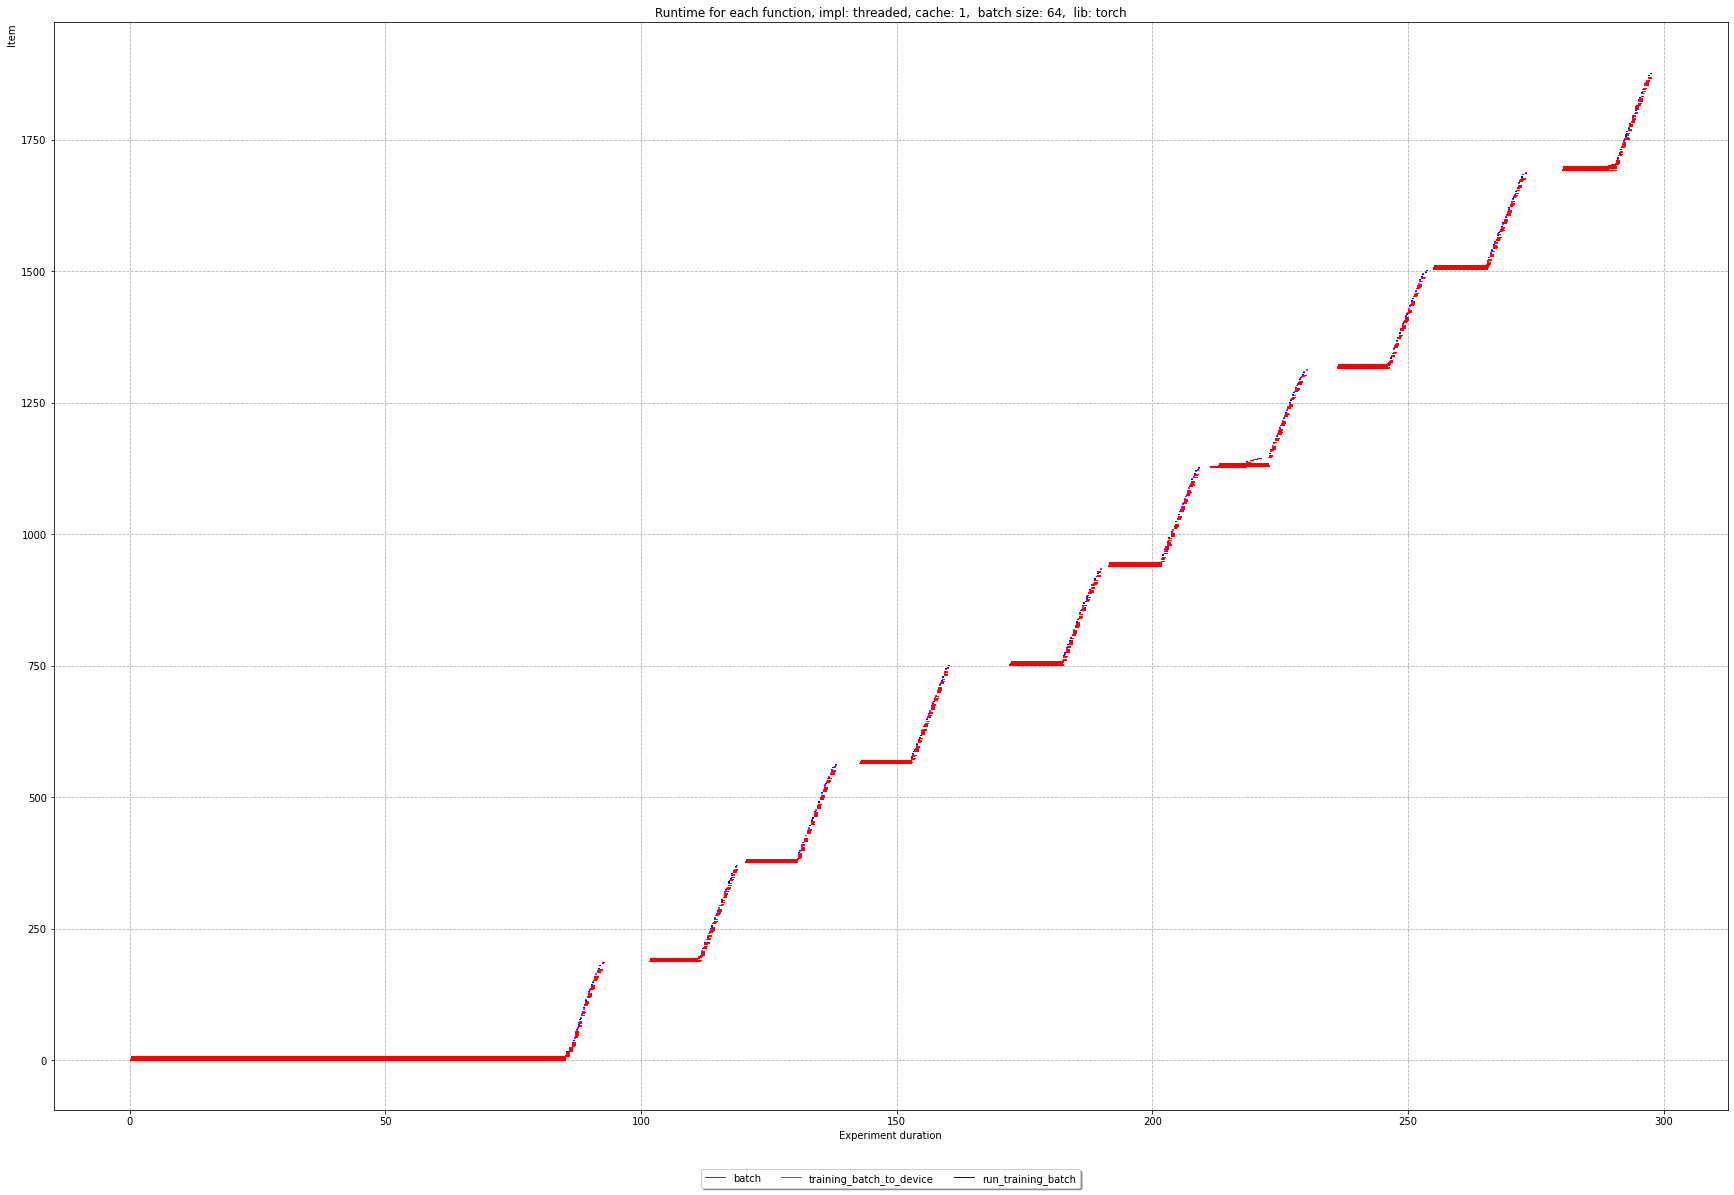

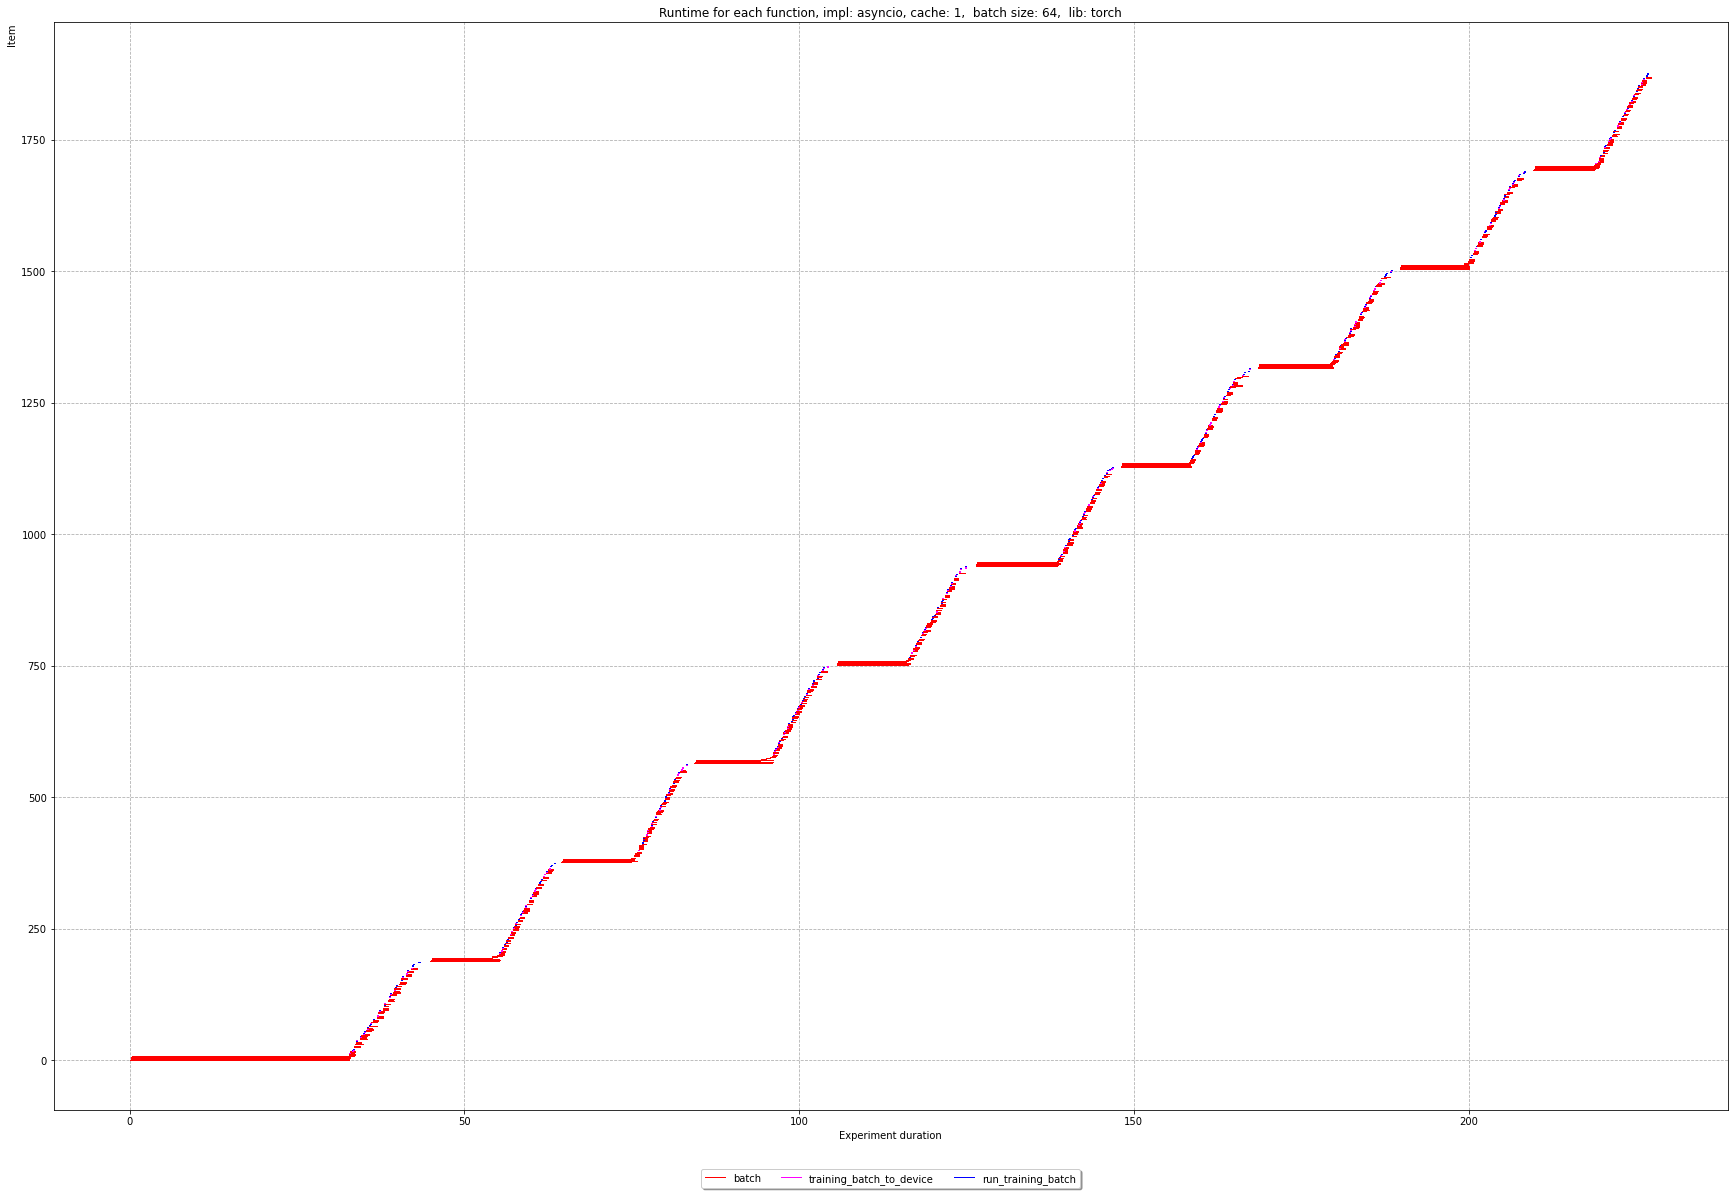

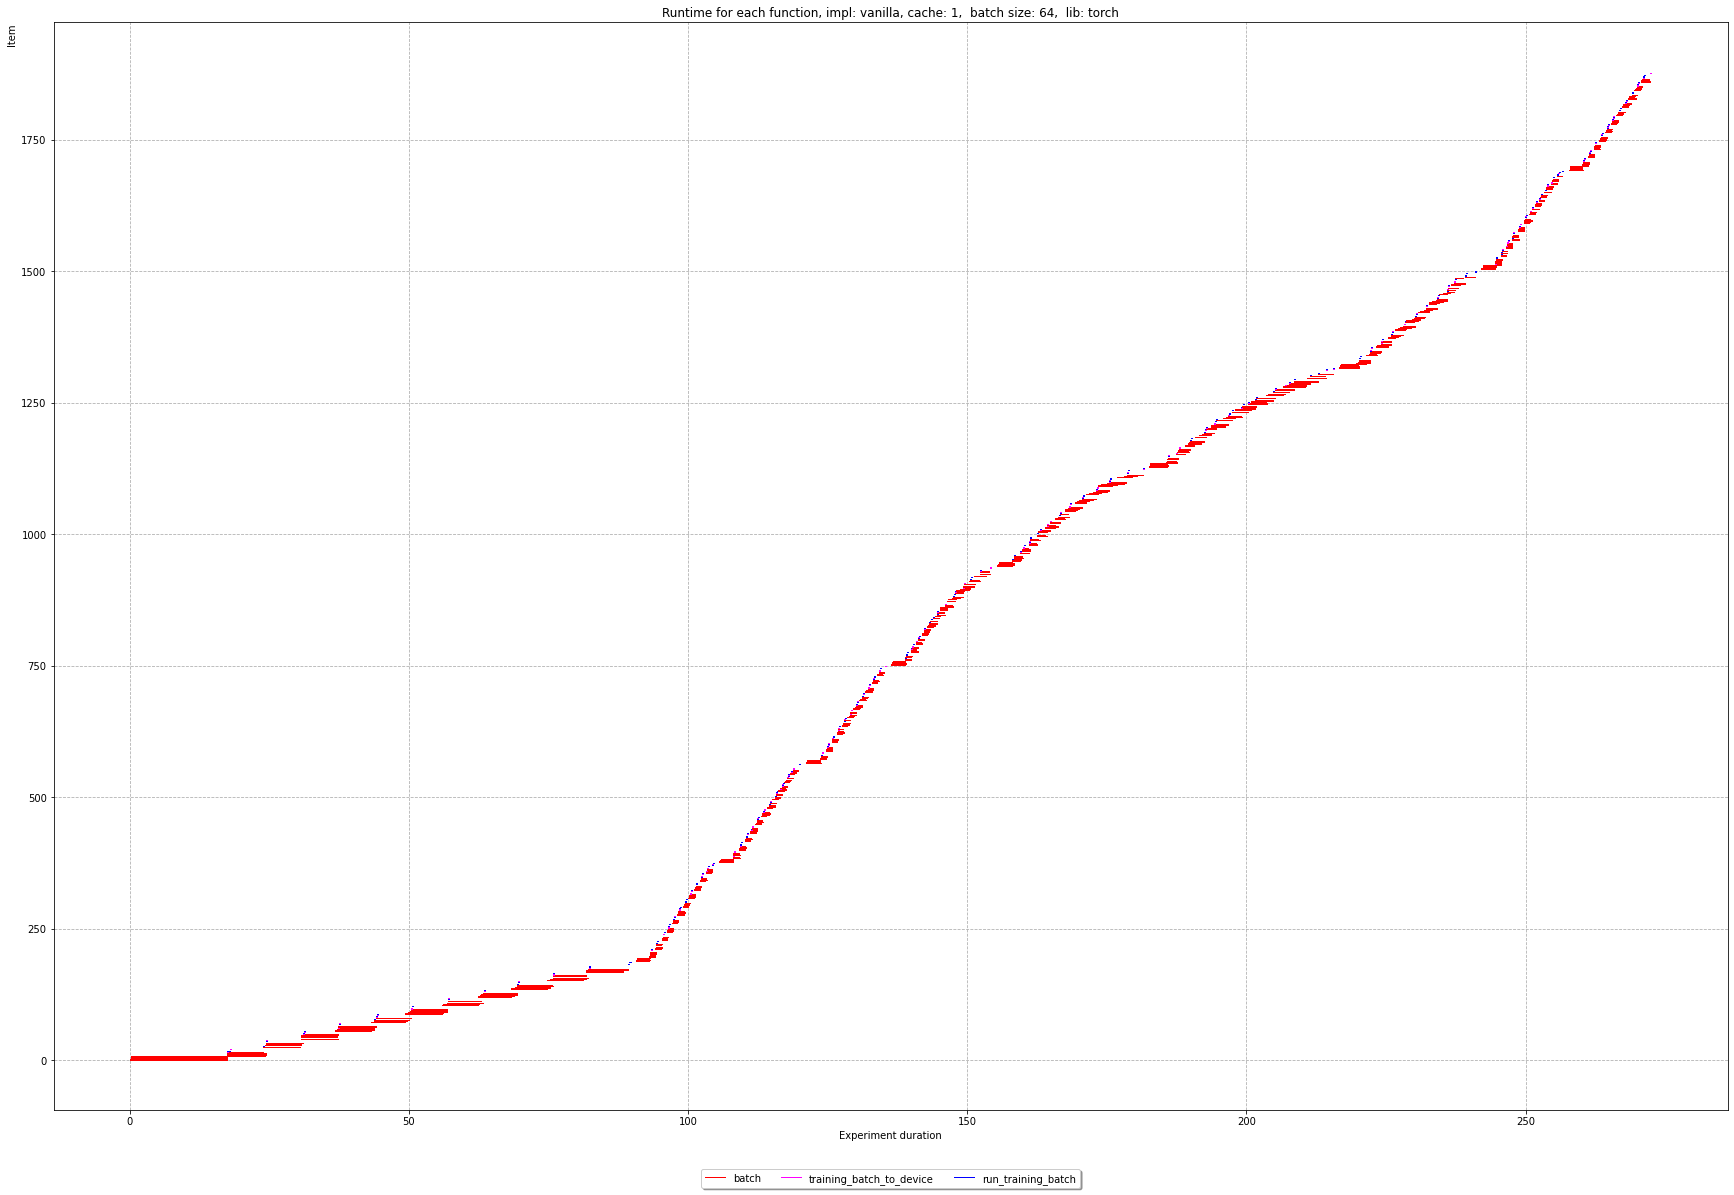

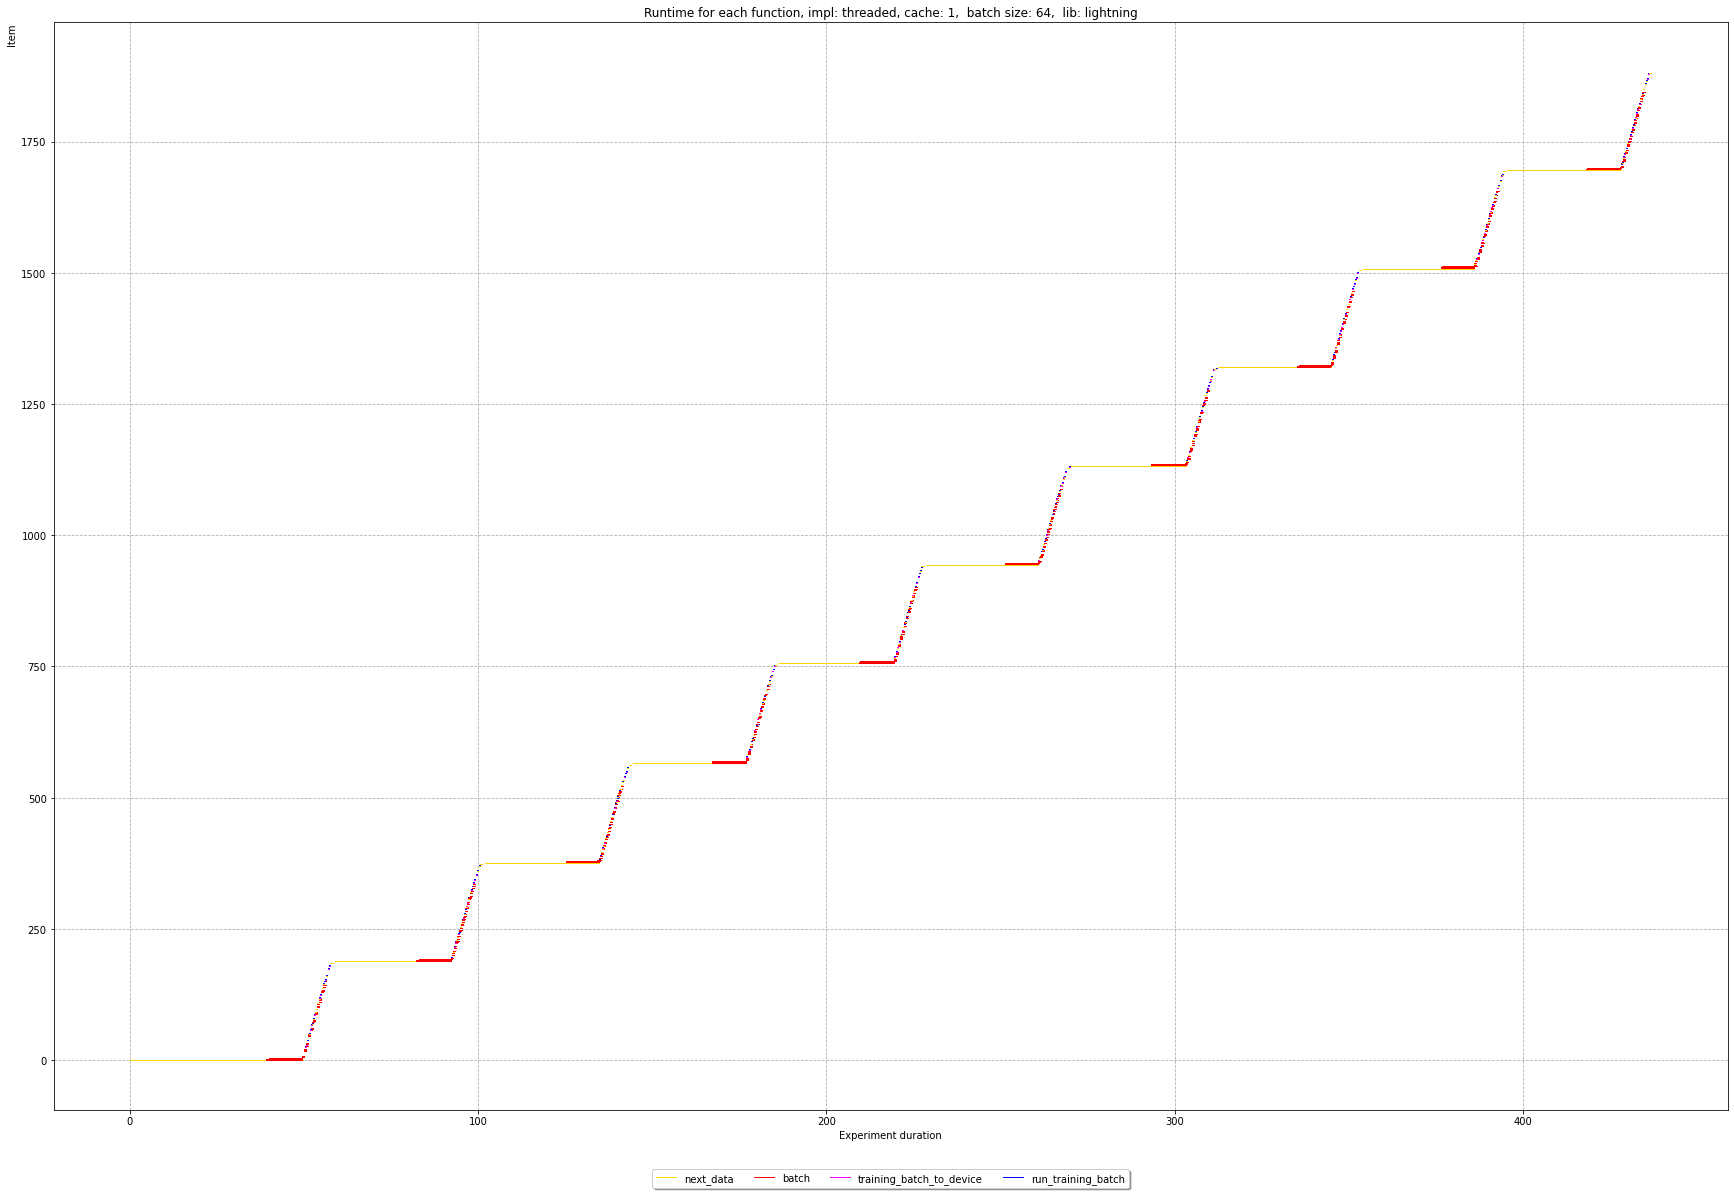

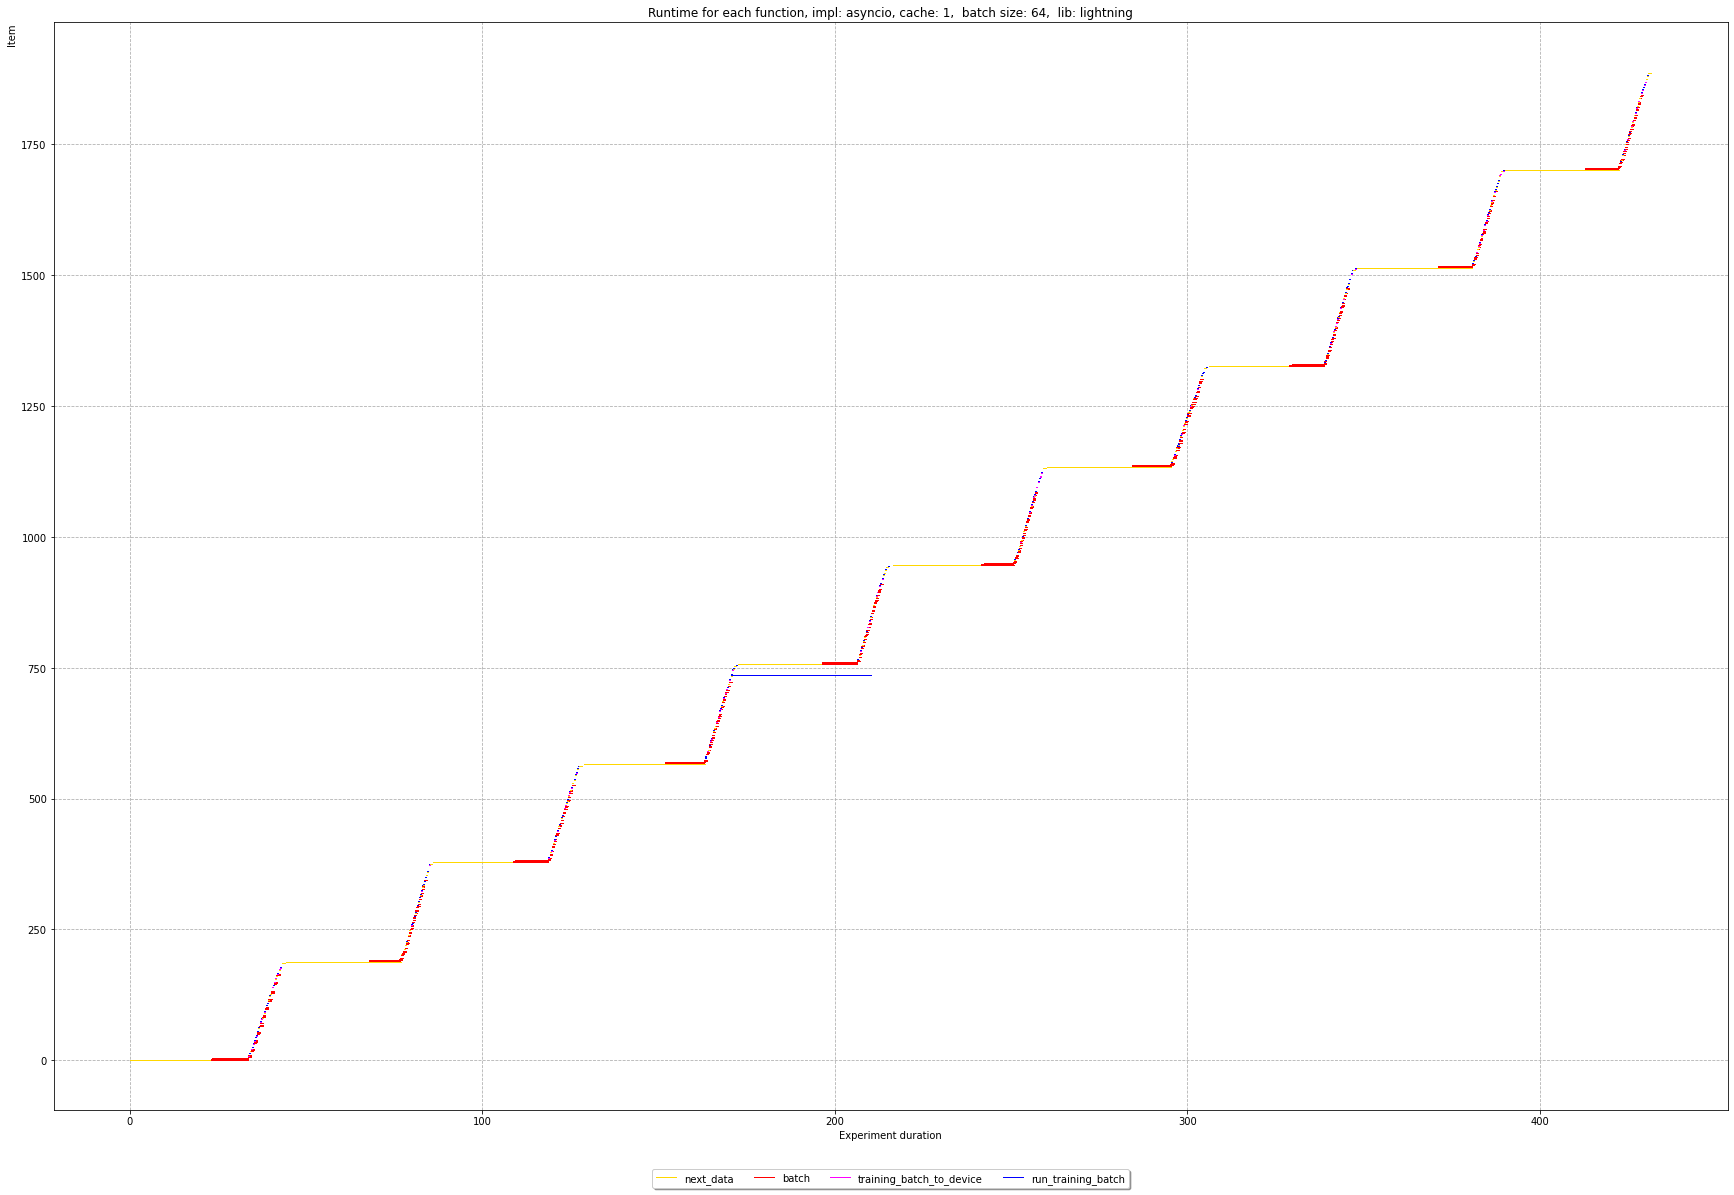

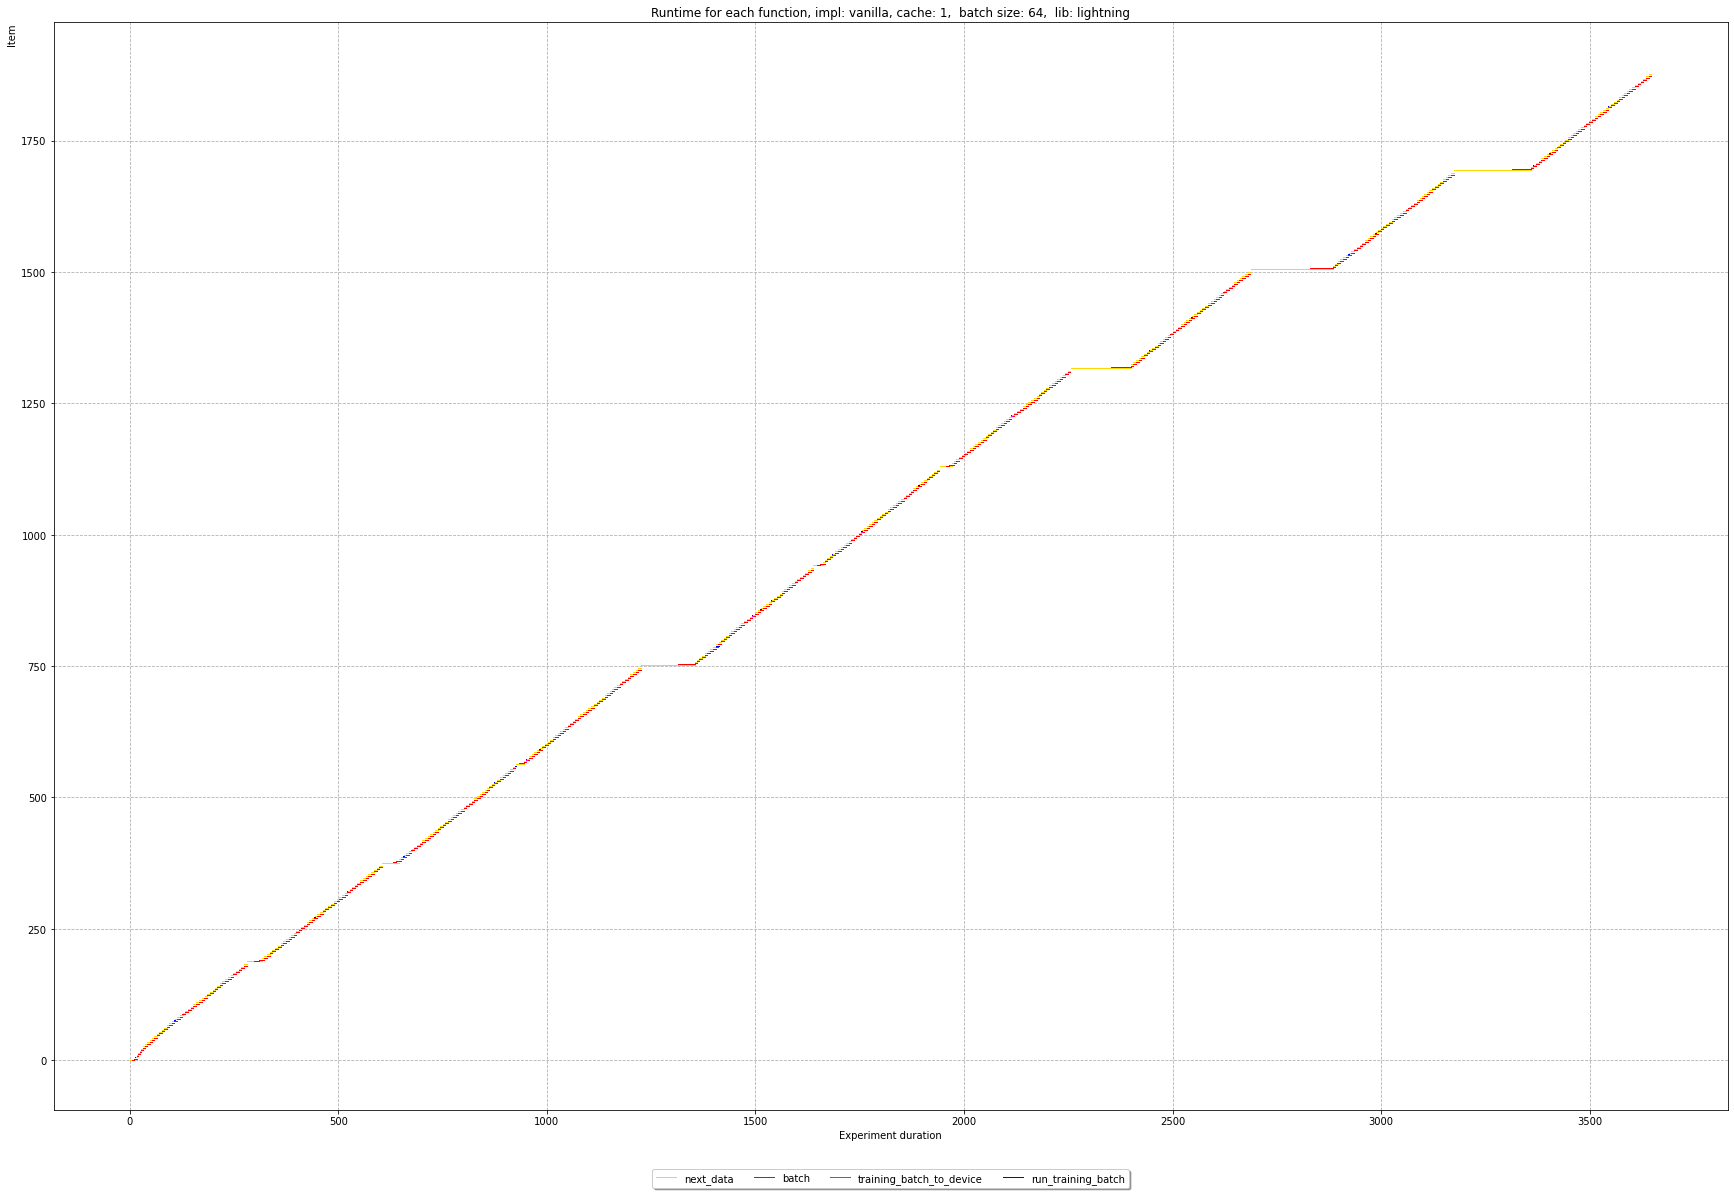

In [11]:
for implementation in ["torch", "lightning"]:
    for run in unique_runs_s3:
        if implementation in run:
            df = df_dataloader_s3[(df_dataloader_s3["run"]==run)]
            show_timelines(df, run, False, False, 1)

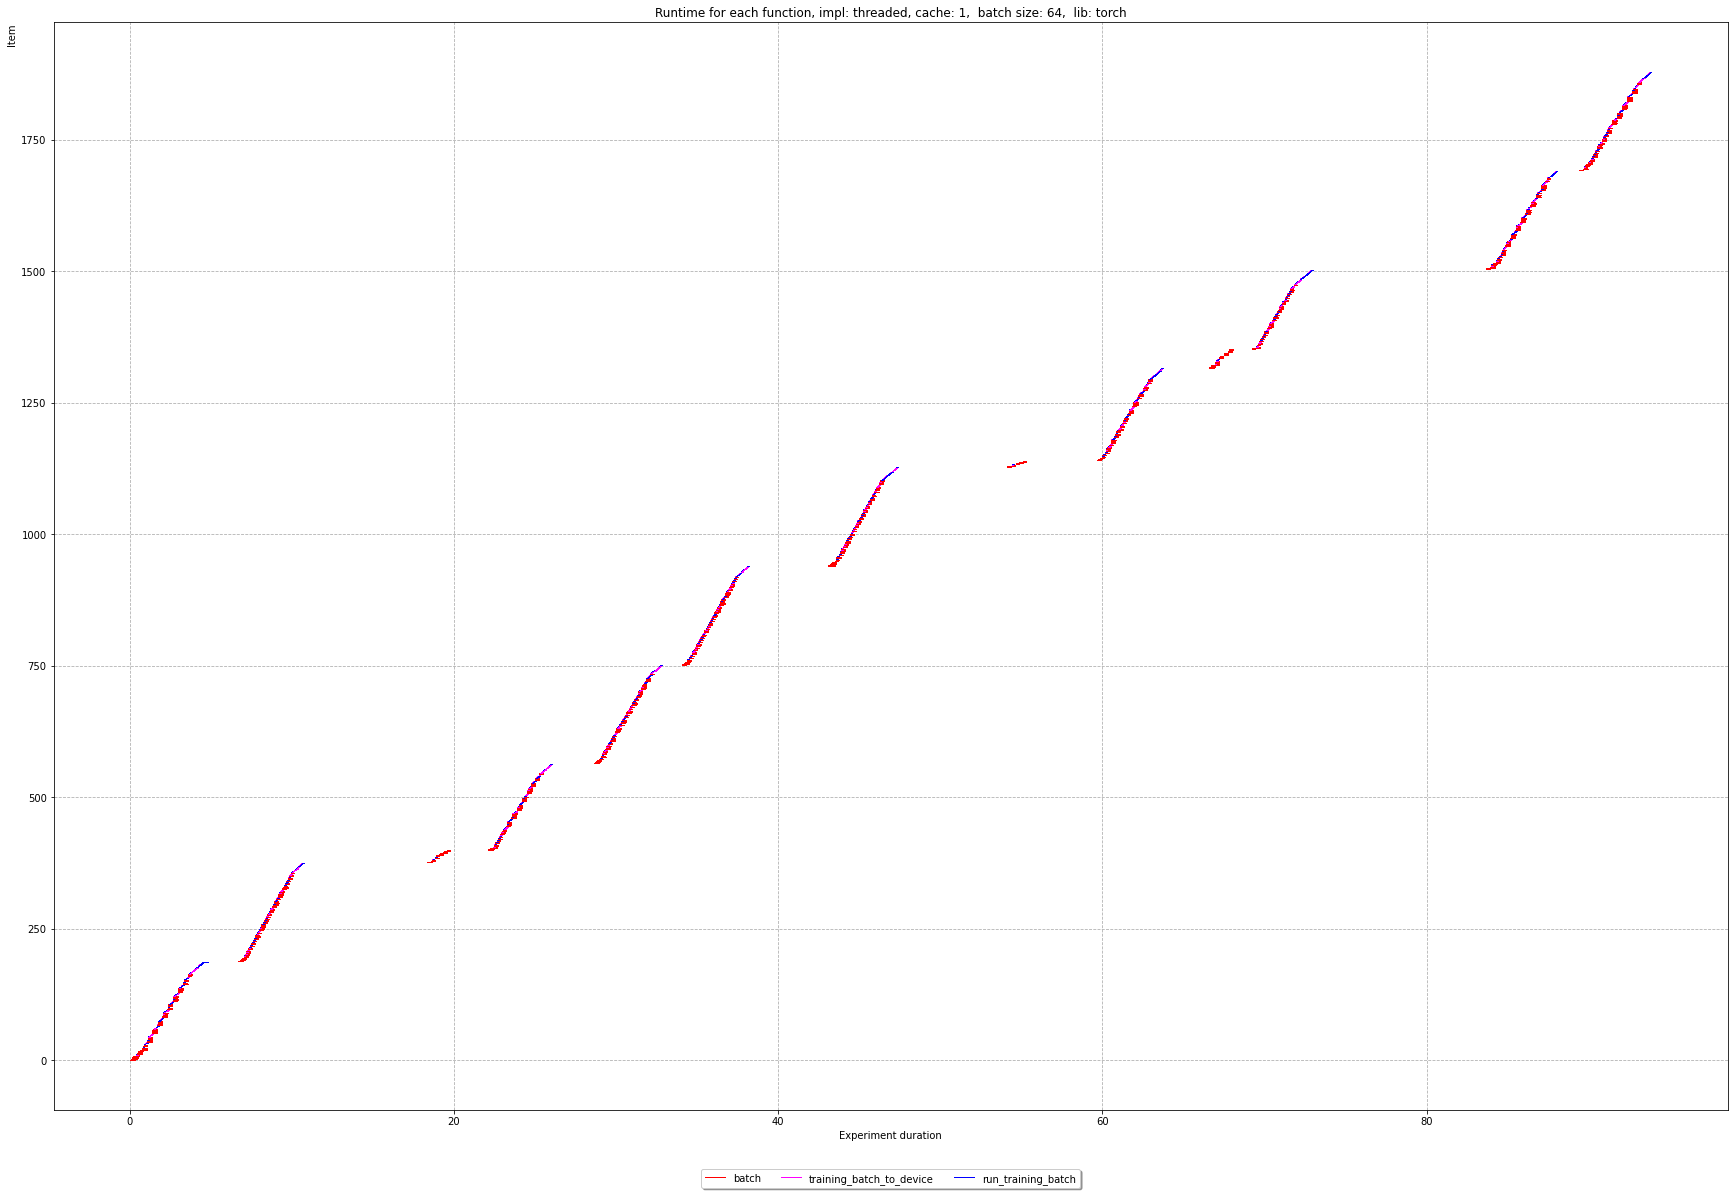

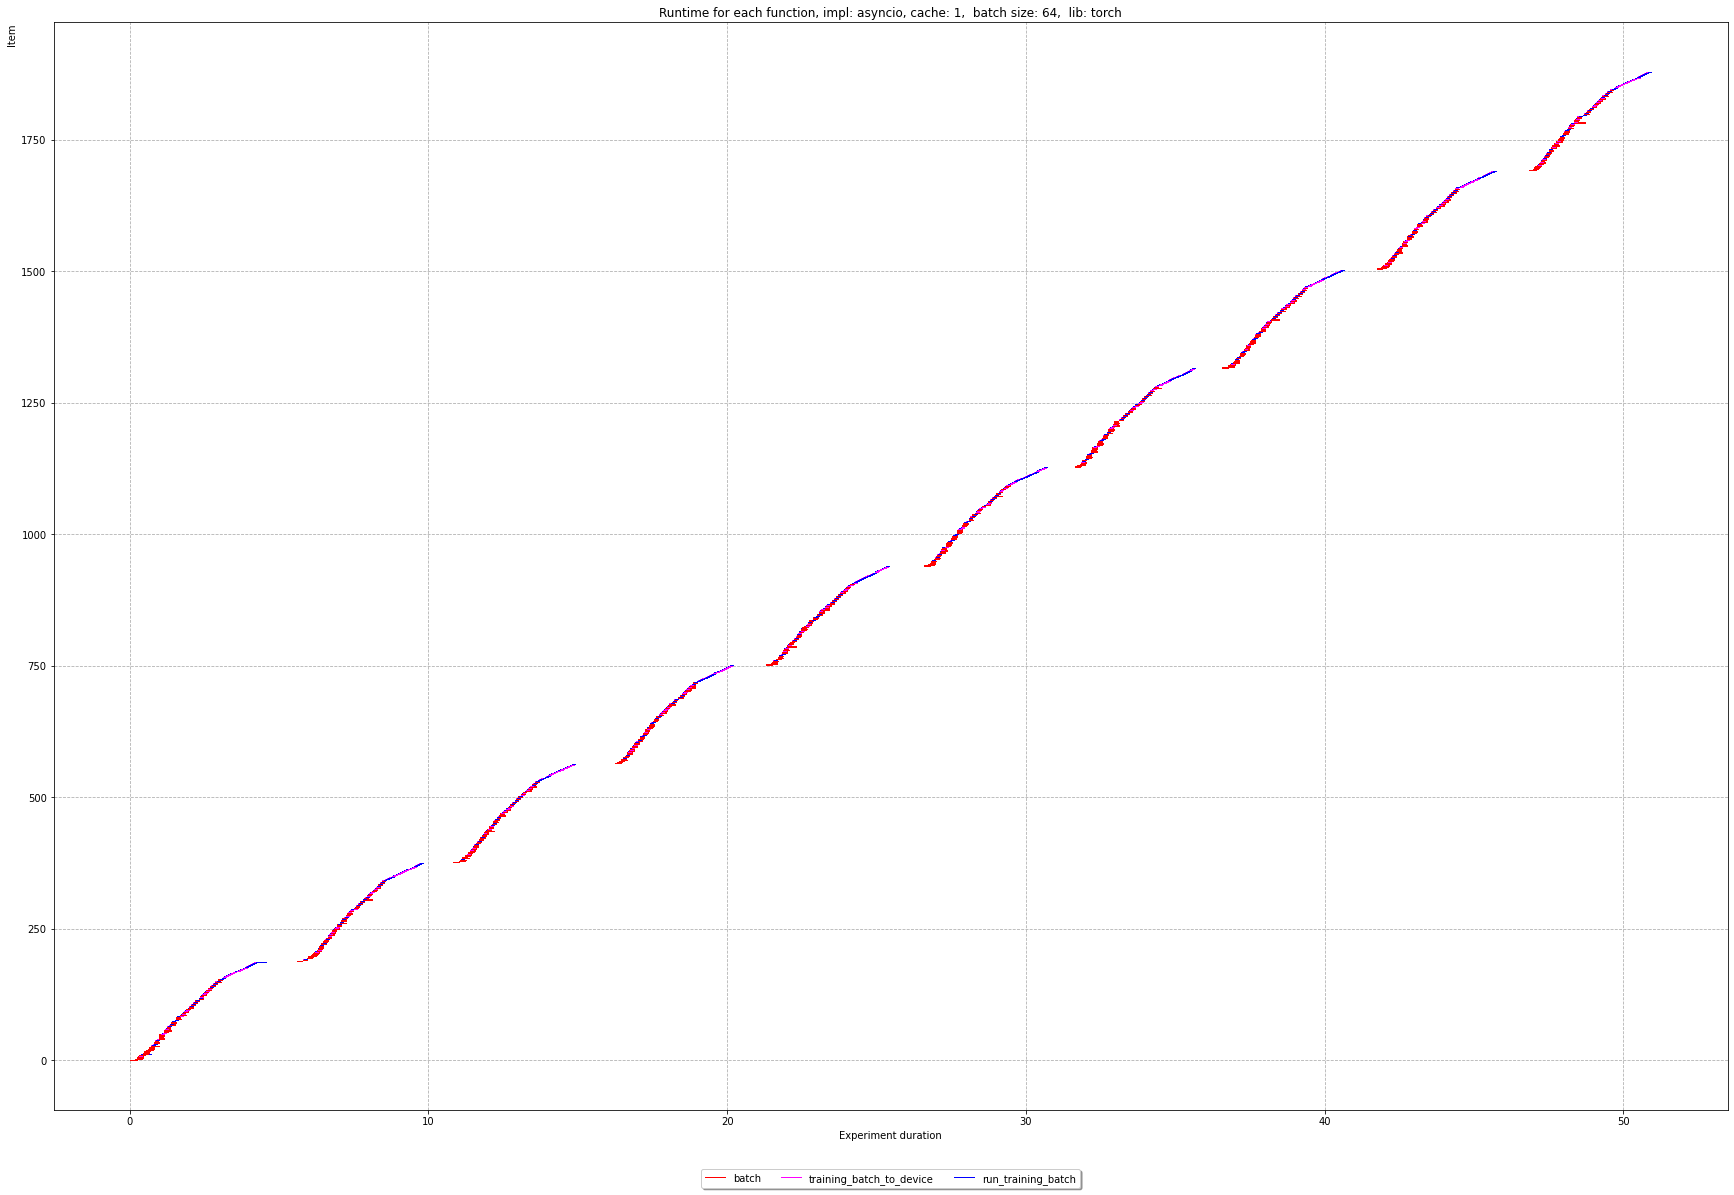

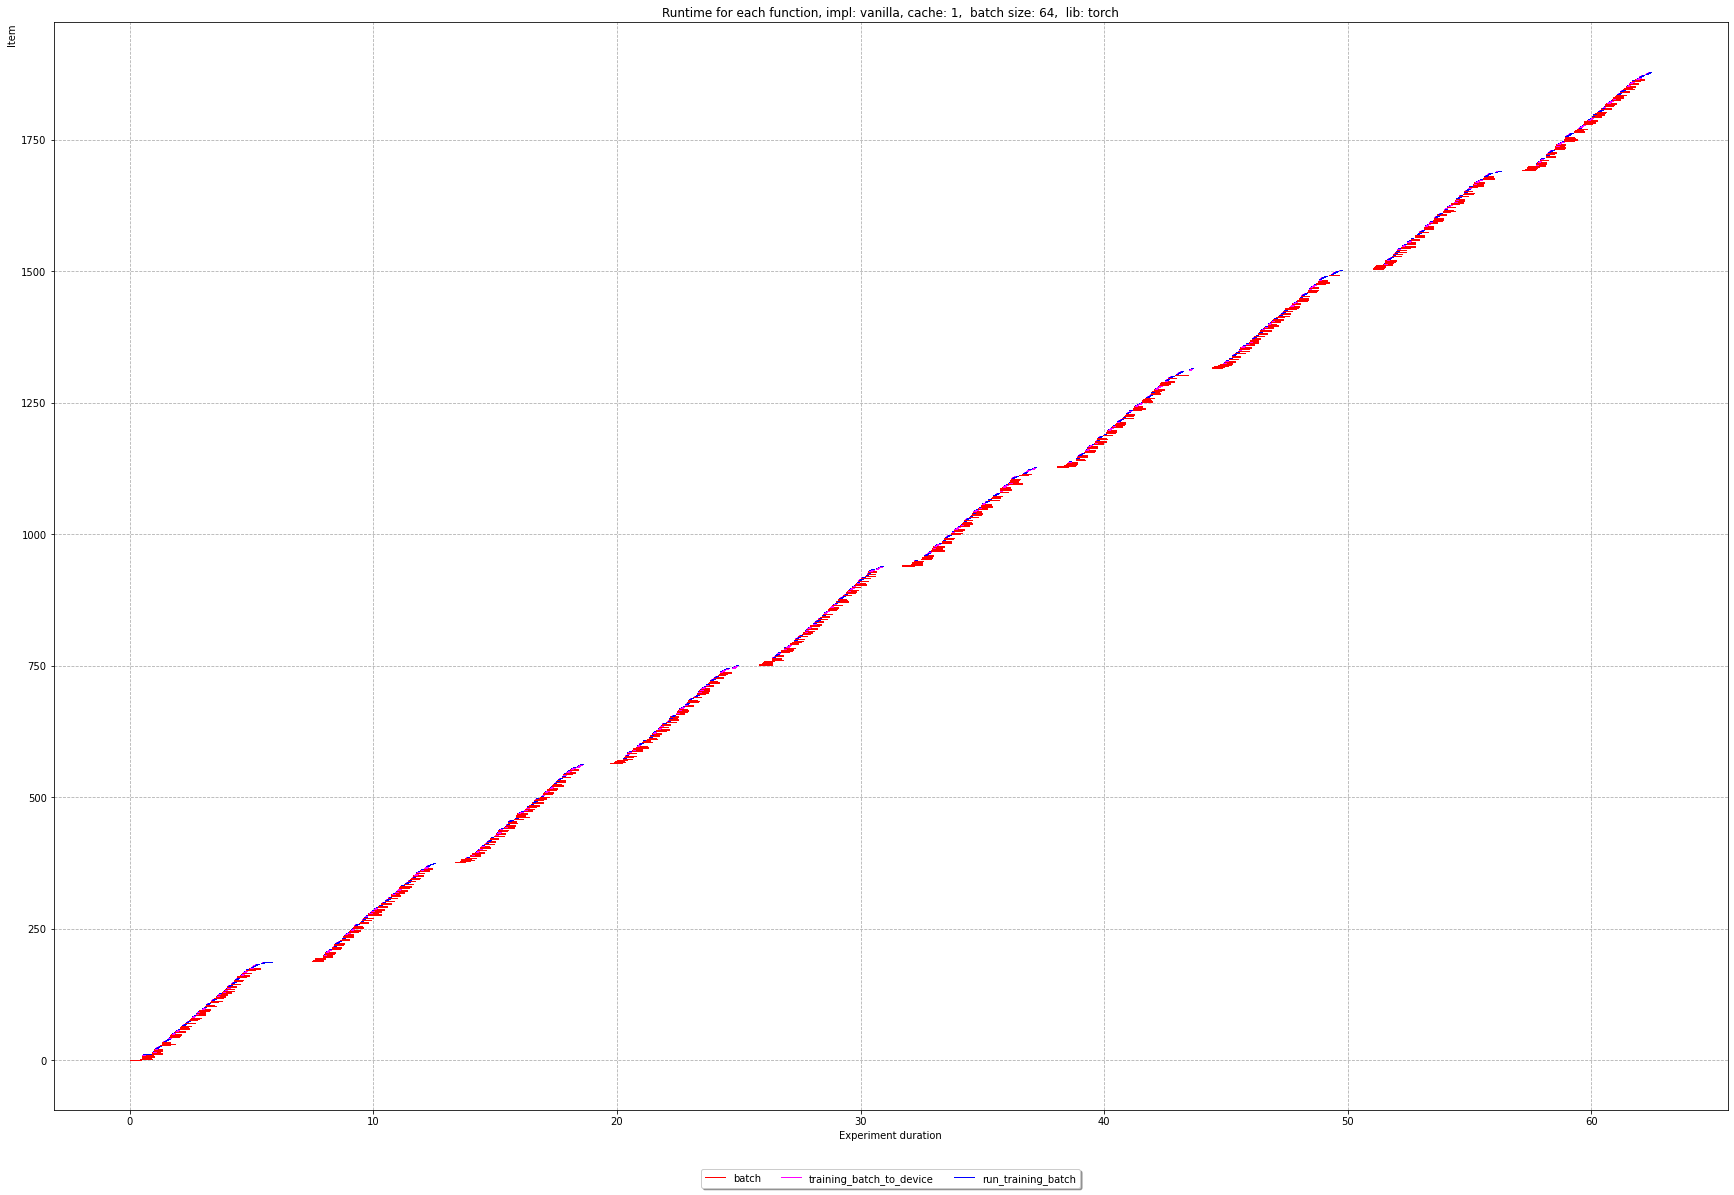

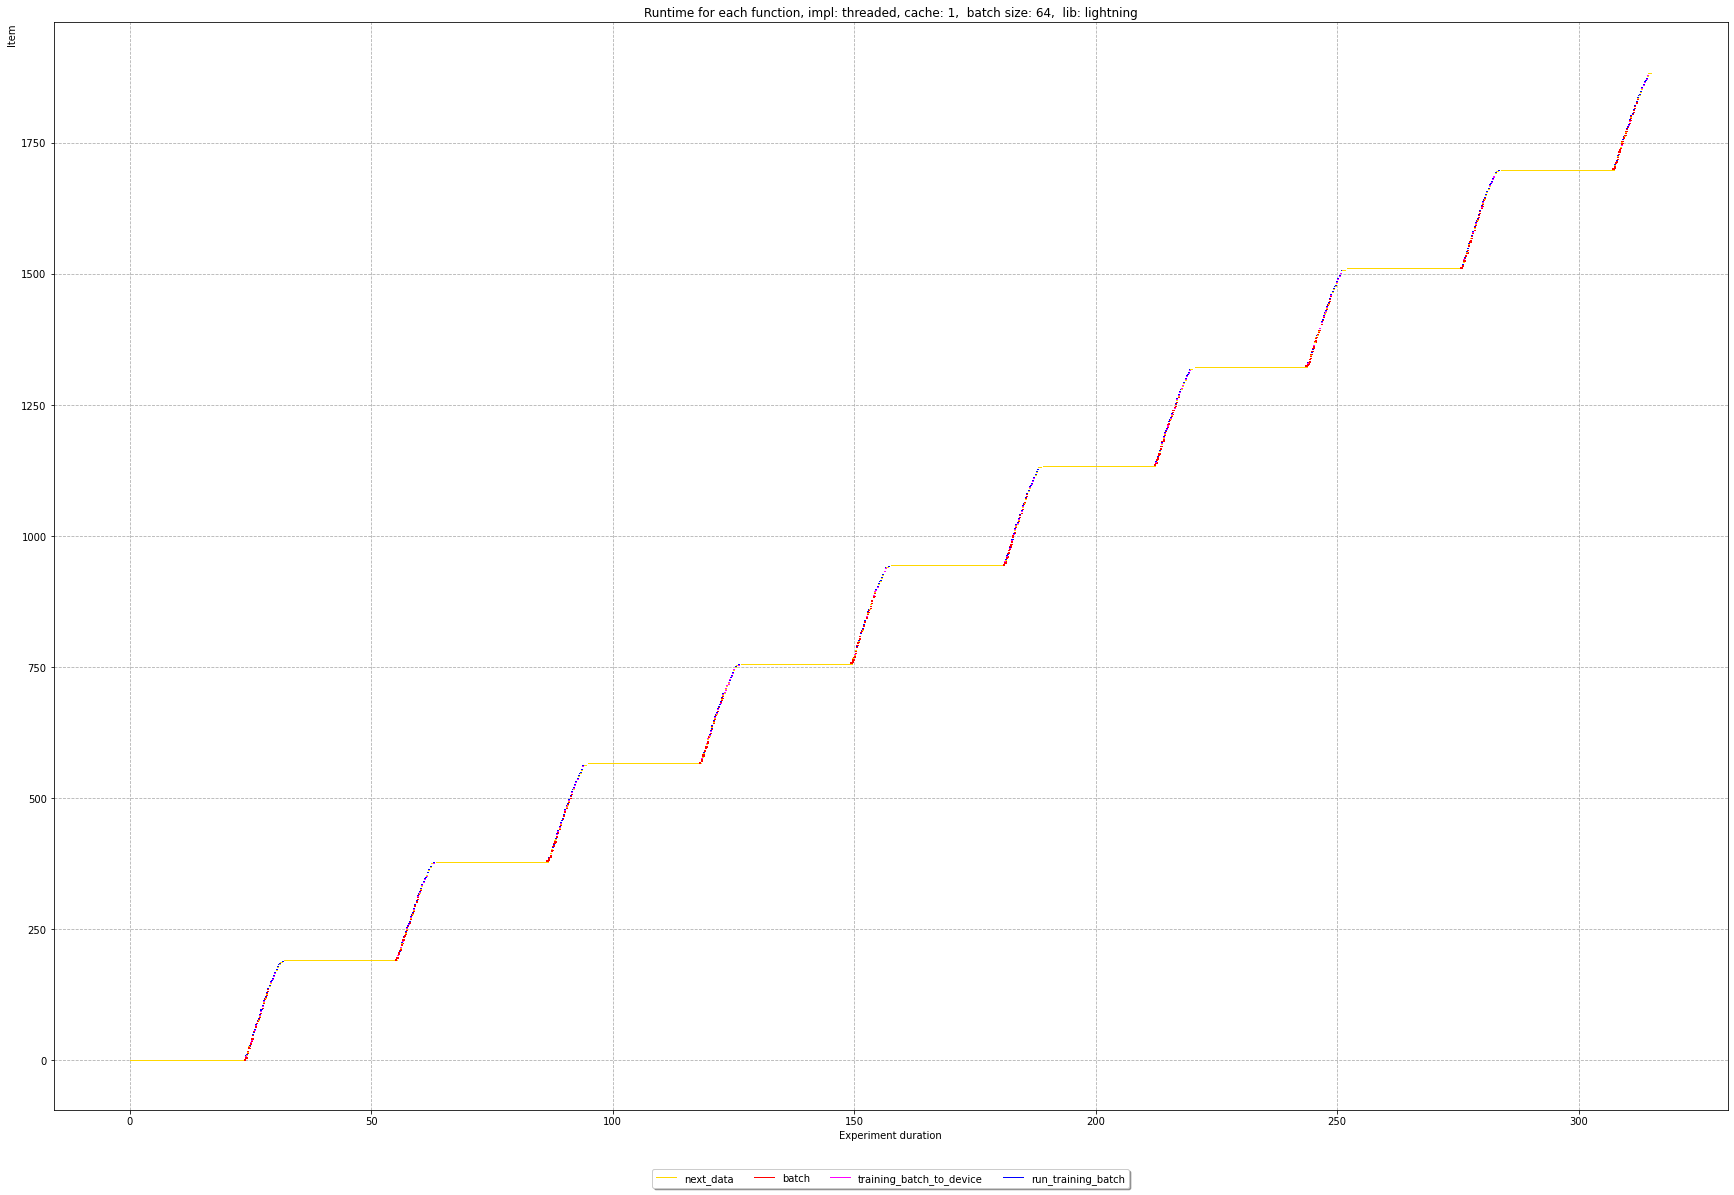

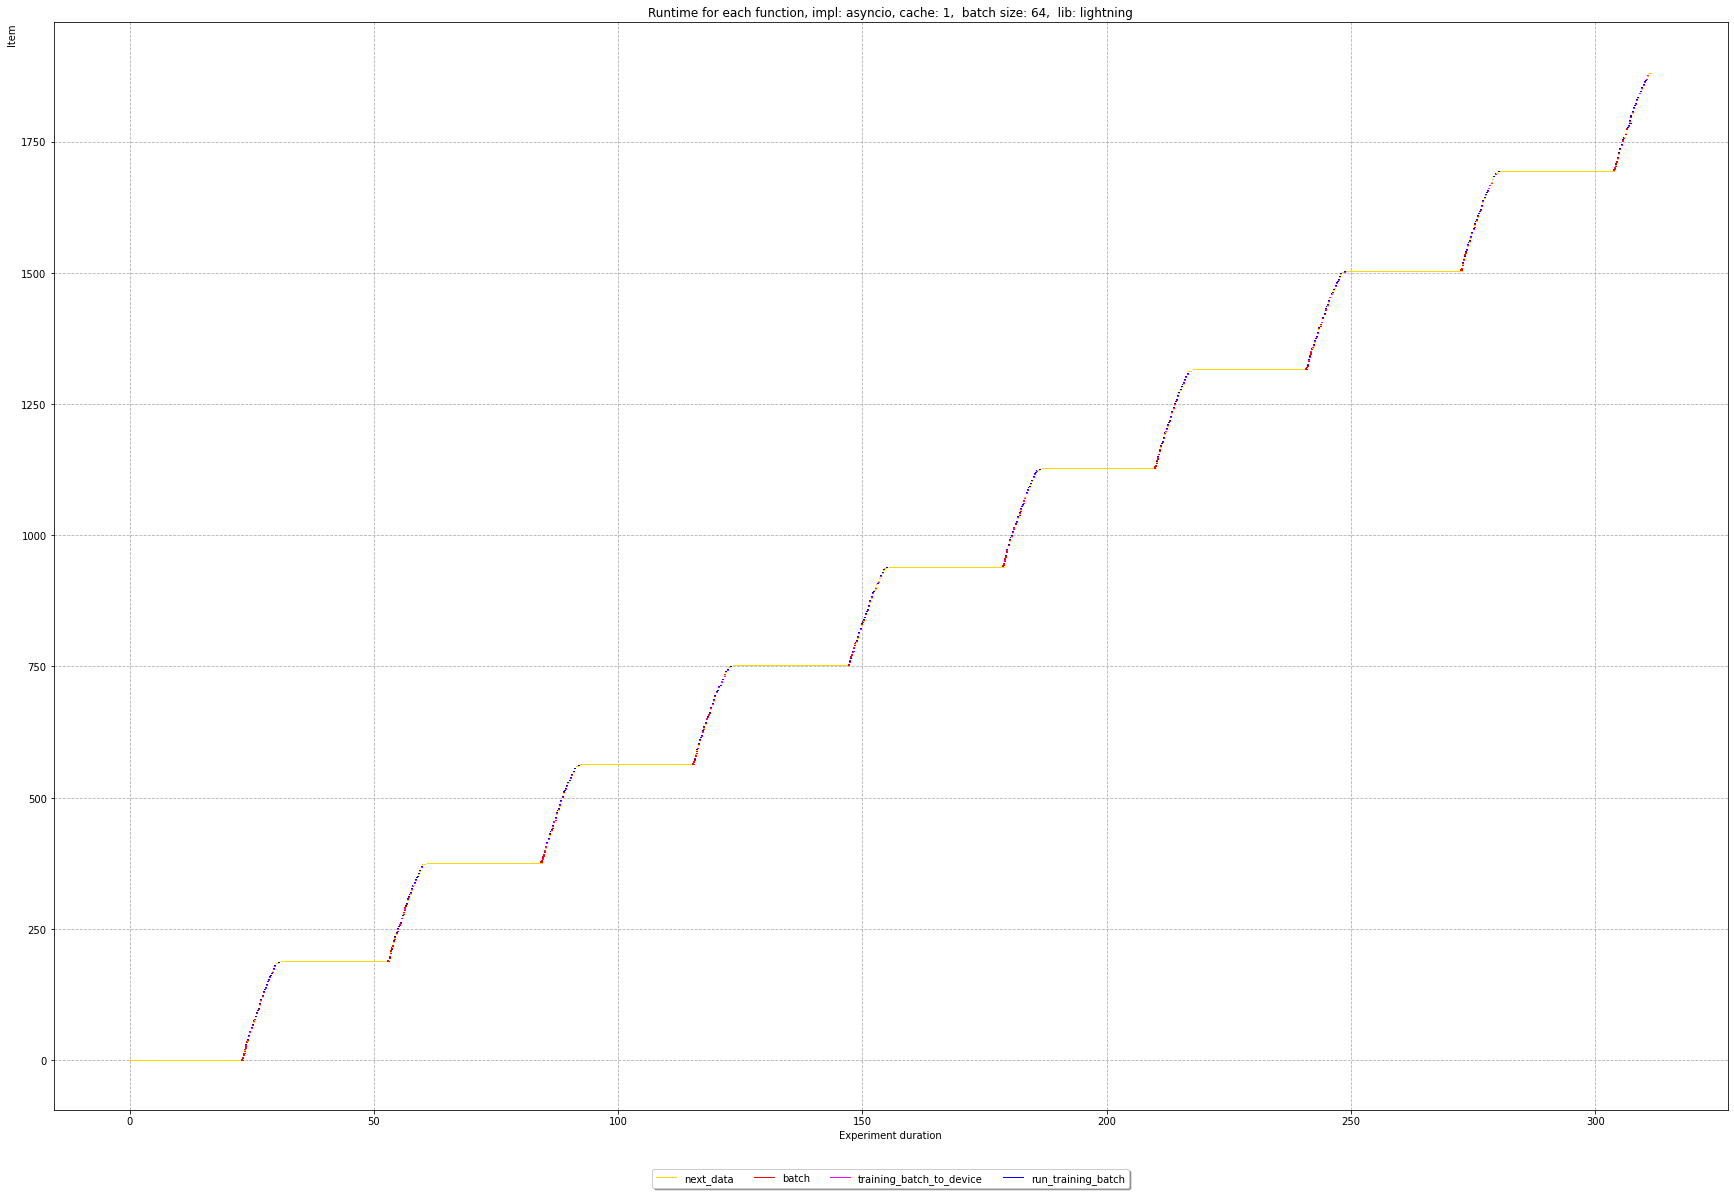

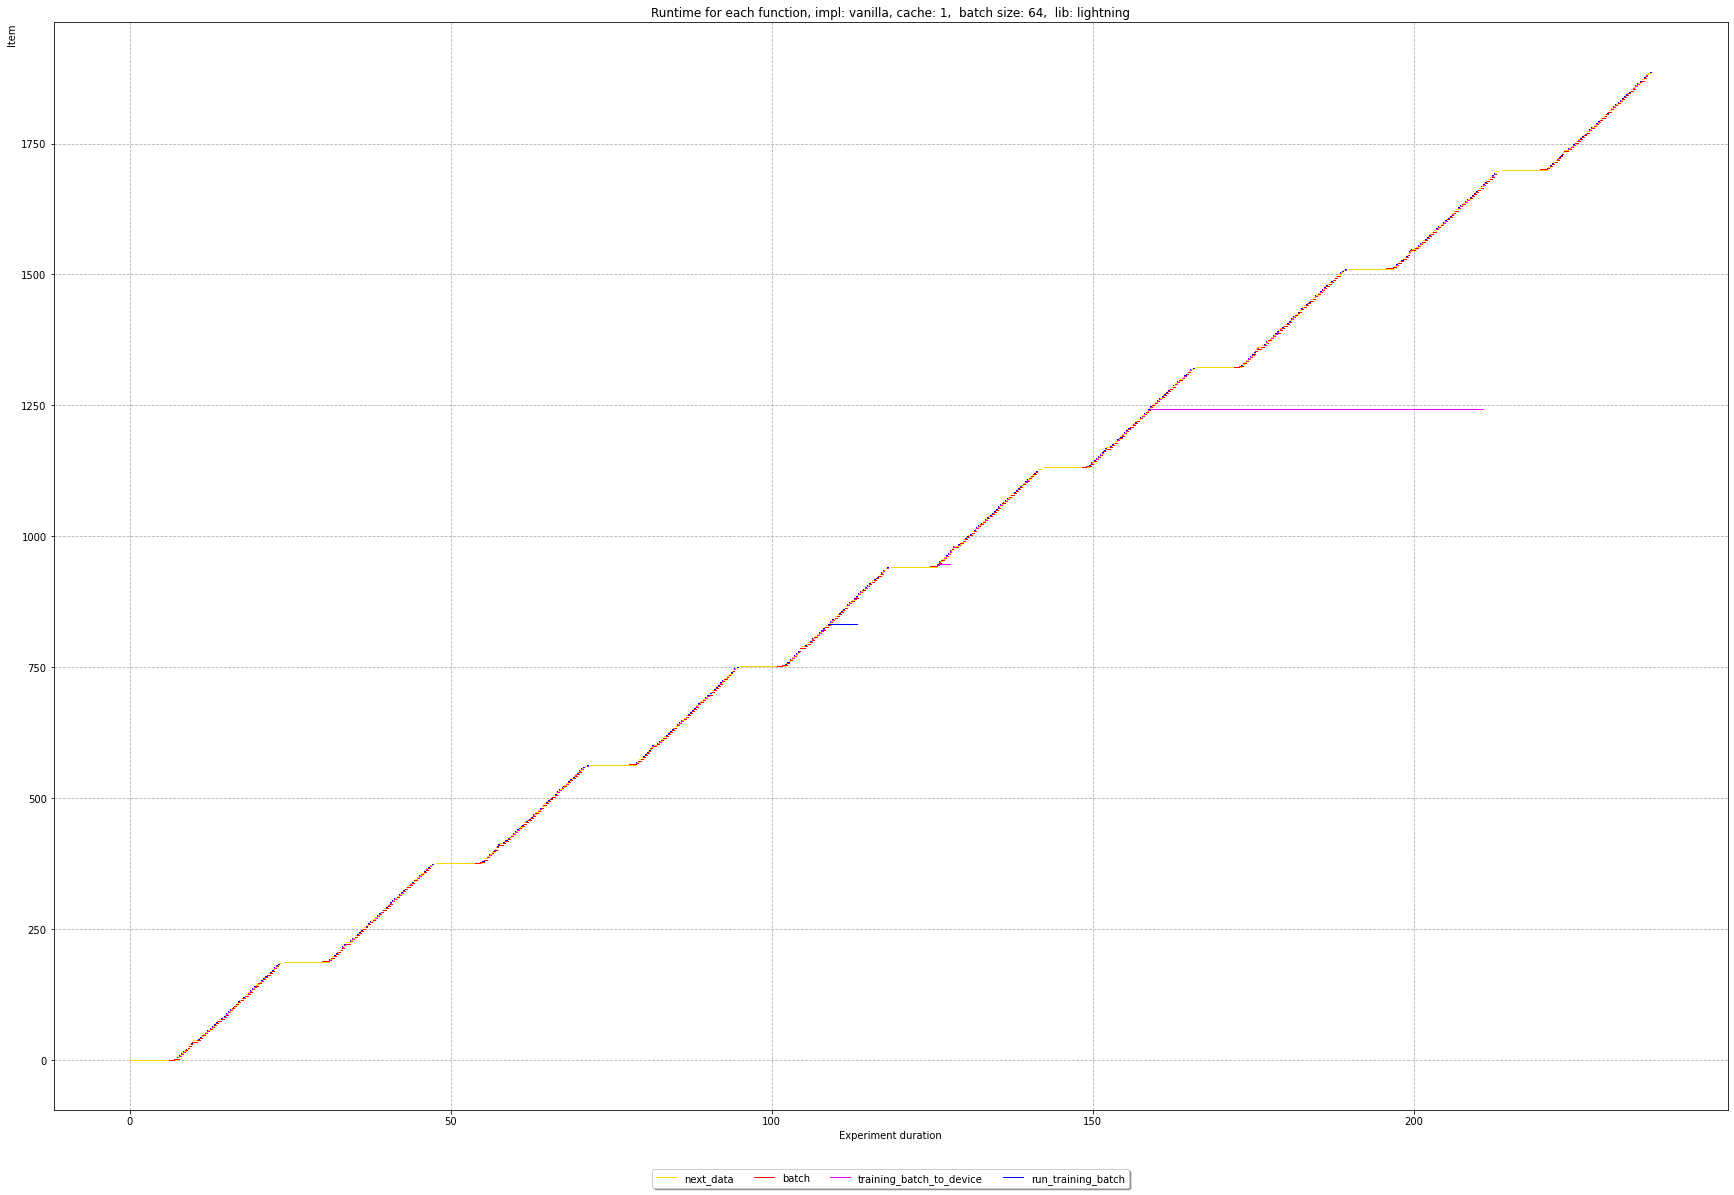

In [12]:
for implementation in ["torch", "lightning"]:
    for run in unique_runs_scratch:
        if implementation in run:
            df = df_dataloader_scratch[(df_dataloader_scratch["run"]==run)]
            show_timelines(df, run, False, False, 1)

In [13]:
def extract_gpuutil(output_base_folder: Path, folder_filter: str = "**", filter_by_metadata: Dict[str, List[str]] = None,
):
    files = list(output_base_folder.rglob(f"{folder_filter}/gpuutil-*.log"))
    data = []
    for working_file_path in tqdm.tqdm(files, total=len(files)):
        results = parse_results_log(working_file_path)
        if len(results) == 0:
            continue
        header = []
        header.append("timestamp")
        for i in results[0]["gpu_data"]:
            header.append(f"gpu_util_{i}")
            header.append(f"mem_util_{i}")
        header.append("run")
        lines = []
        for result in results:
            line = []
            line.append(result["timestamp"])
            for item in result["gpu_data"]:
                line.append(result["gpu_data"][item]["gpu_util"])
                line.append(result["gpu_data"][item]["mem_util"])
            line.append(working_file_path.parent.name)
            lines.append(line)
        results = pd.DataFrame.from_records(lines)
        data.append(results)
    df = pd.concat(data)
    df.columns = header
    df.groupby
    df.sort_values(["timestamp"], ascending=True)
    return df

In [14]:
df_gpuutil_s3 = extract_gpuutil(output_base_folder, folder_filter=s3_folder_filter)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:14<00:00, 15.40it/s]


In [15]:
df_gpuutil_scratch = extract_gpuutil(output_base_folder, folder_filter=scratch_folder_filter)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:12<00:00, 17.41it/s]


In [16]:
unique_runs_s3 = np.unique(df_dataloader_s3["run"])

In [17]:
unique_runs_scratch = np.unique(df_dataloader_scratch["run"])

In [18]:
print(unique_runs_s3, unique_runs_scratch)

['20211118f090621_benchmark_e2e_torch_s3_64_4_16_1_threaded_sync'
 '20211118f091616_benchmark_e2e_lightning_s3_64_4_16_1_threaded_sync'
 '20211118f093102_benchmark_e2e_torch_s3_64_4_16_1_asyncio_sync'
 '20211118f093632_benchmark_e2e_lightning_s3_64_4_16_1_asyncio_sync'
 '20211118f095018_benchmark_e2e_torch_s3_64_4_16_1_vanilla_sync'
 '20211118f095518_benchmark_e2e_lightning_s3_64_4_16_1_vanilla_sync'] ['20211118f092349_benchmark_e2e_torch_scratch_64_4_16_1_threaded_sync'
 '20211118f092535_benchmark_e2e_lightning_scratch_64_4_16_1_threaded_sync'
 '20211118f094356_benchmark_e2e_torch_scratch_64_4_16_1_asyncio_sync'
 '20211118f094455_benchmark_e2e_lightning_scratch_64_4_16_1_asyncio_sync'
 '20211118f105618_benchmark_e2e_torch_scratch_64_4_16_1_vanilla_sync'
 '20211118f105735_benchmark_e2e_lightning_scratch_64_4_16_1_vanilla_sync']


In [25]:
def show_timelines_with_gpu(df, gpu_util, run, flat=False, show_gpu=False, zoom=False, zoom_epochs = 1):
    fig, ax = plt.subplots(figsize=(30, 25))
    # fig, ax = plt.subplots()
    plt.rcParams.update({'font.size': 18})
    data = defaultdict(list)
    start = min(df["start_time_x"]) 
    end = max(df["end_time_y"]) 
    gpu_start = min(gpu_util["timestamp"])
    gpu_end = max(gpu_util["timestamp"])
    
    total_runtime = (end - start)
    number_of_epochs = 20
    
    if zoom:
        df = df[df["start_time_x"] < start+((total_runtime / number_of_epochs) * zoom_epochs)]
        gpu_util = gpu_util[gpu_util["timestamp"] < gpu_start+((total_runtime / number_of_epochs) * zoom_epochs)]
    
    lane = 0
    for index, row in df.sort_values(["start_time_x"], ascending=True).iterrows():
        duration = row["end_time_y"] - row["start_time_x"] 
        x1 = row["start_time_x"] - start 
        if duration < 0.15:
            duration = 0.2
        x2 = x1 + duration
        if not flat:
            lane += 10
        else:
            lane = lanes[row["item_x"]]
        ax.plot([x1, x2], [lane, lane], color=colors[row["item_x"]], label=row["item_x"], linewidth=3)
    

    ax.set_xlabel("Experiment duration (S)", loc="right")
    ax.set_ylabel("Operation activity lane", loc="center")
    filename = run.split('_')

    
    ax.legend()
    ax.grid(linestyle='--', which="both")

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))

    # Put a legend below current axis
    ax.legend(by_label.values(), by_label.keys(), 
              loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=5)
    
    gpu_util_mean = 0
    gpu_util_mean_no_zeros = 0
    
    if show_gpu:
        ax2 = ax.twinx() 
        ax2.set_ylabel('GPU/Memory utilization (green, maroon)')
        
        r'{\fontsize{50pt}{3em}\selectfont{}a}{\fontsize{20pt}{3em}\selectfont{}N'
        ax2.set_ylim([-3, 103])
        gpu_events = []
        for i in gpu_util["timestamp"]:
            gpu_events.append(i - start)
        ax2.plot(gpu_events, gpu_util["gpu_util_2"], color="cyan", linestyle="--", linewidth=2)
        ax2.plot(gpu_events, gpu_util["mem_util_2"], color="maroon", linestyle="--", linewidth=2)
        gpu_util_zeros = (len(gpu_util[gpu_util['gpu_util_2'] == 0]['gpu_util_2']) / len(gpu_util['gpu_util_2'])) * 100        
        gpu_util_mean_no_zeros = np.mean(gpu_util[gpu_util['gpu_util_2'] > 0]['gpu_util_2']) 
        mem_util_mean = np.mean(gpu_util['mem_util_2'])
        mem_util_mean_no_zeros = np.mean(gpu_util[gpu_util['mem_util_2'] > 0]['mem_util_2']) 
        ax2.plot(gpu_events, [gpu_util_mean_no_zeros]*len(gpu_events), label='GPU Util Mean', linewidth=2, color='cyan')
        ax2.plot(gpu_events, [mem_util_mean_no_zeros]*len(gpu_events), label='Mem Util Mean', linewidth=2, color='maroon')
        print(gpu_util_mean_no_zeros, mem_util_mean_no_zeros)
        
        
    ax.set_title(f"Total runtime per operation \n Implementation: {filename[9]},"
             #f" use cache: {filename[8]}, "
             f" batch size: {filename[5]}, "
             f" library: {filename[3]}, "
             f"\n GPU unused: {round(gpu_util_zeros, 2)} %, "
             f" mean GPU usage: {round(gpu_util_mean_no_zeros, 2)} %",
             loc='center')

    plt.show()
    return {"runtime": end-start, 
            "gpu_util_zero": gpu_util_zeros, 
            "gpu_util_mean_no_zeros": gpu_util_mean_no_zeros, 
            "mem_util_mean": mem_util_mean, 
            "mem_util_mean_no_zeros": mem_util_mean_no_zeros, 
            "implementation": filename[9],
            "library": filename[3]
           }

45.14141414141414 28.337078651685392


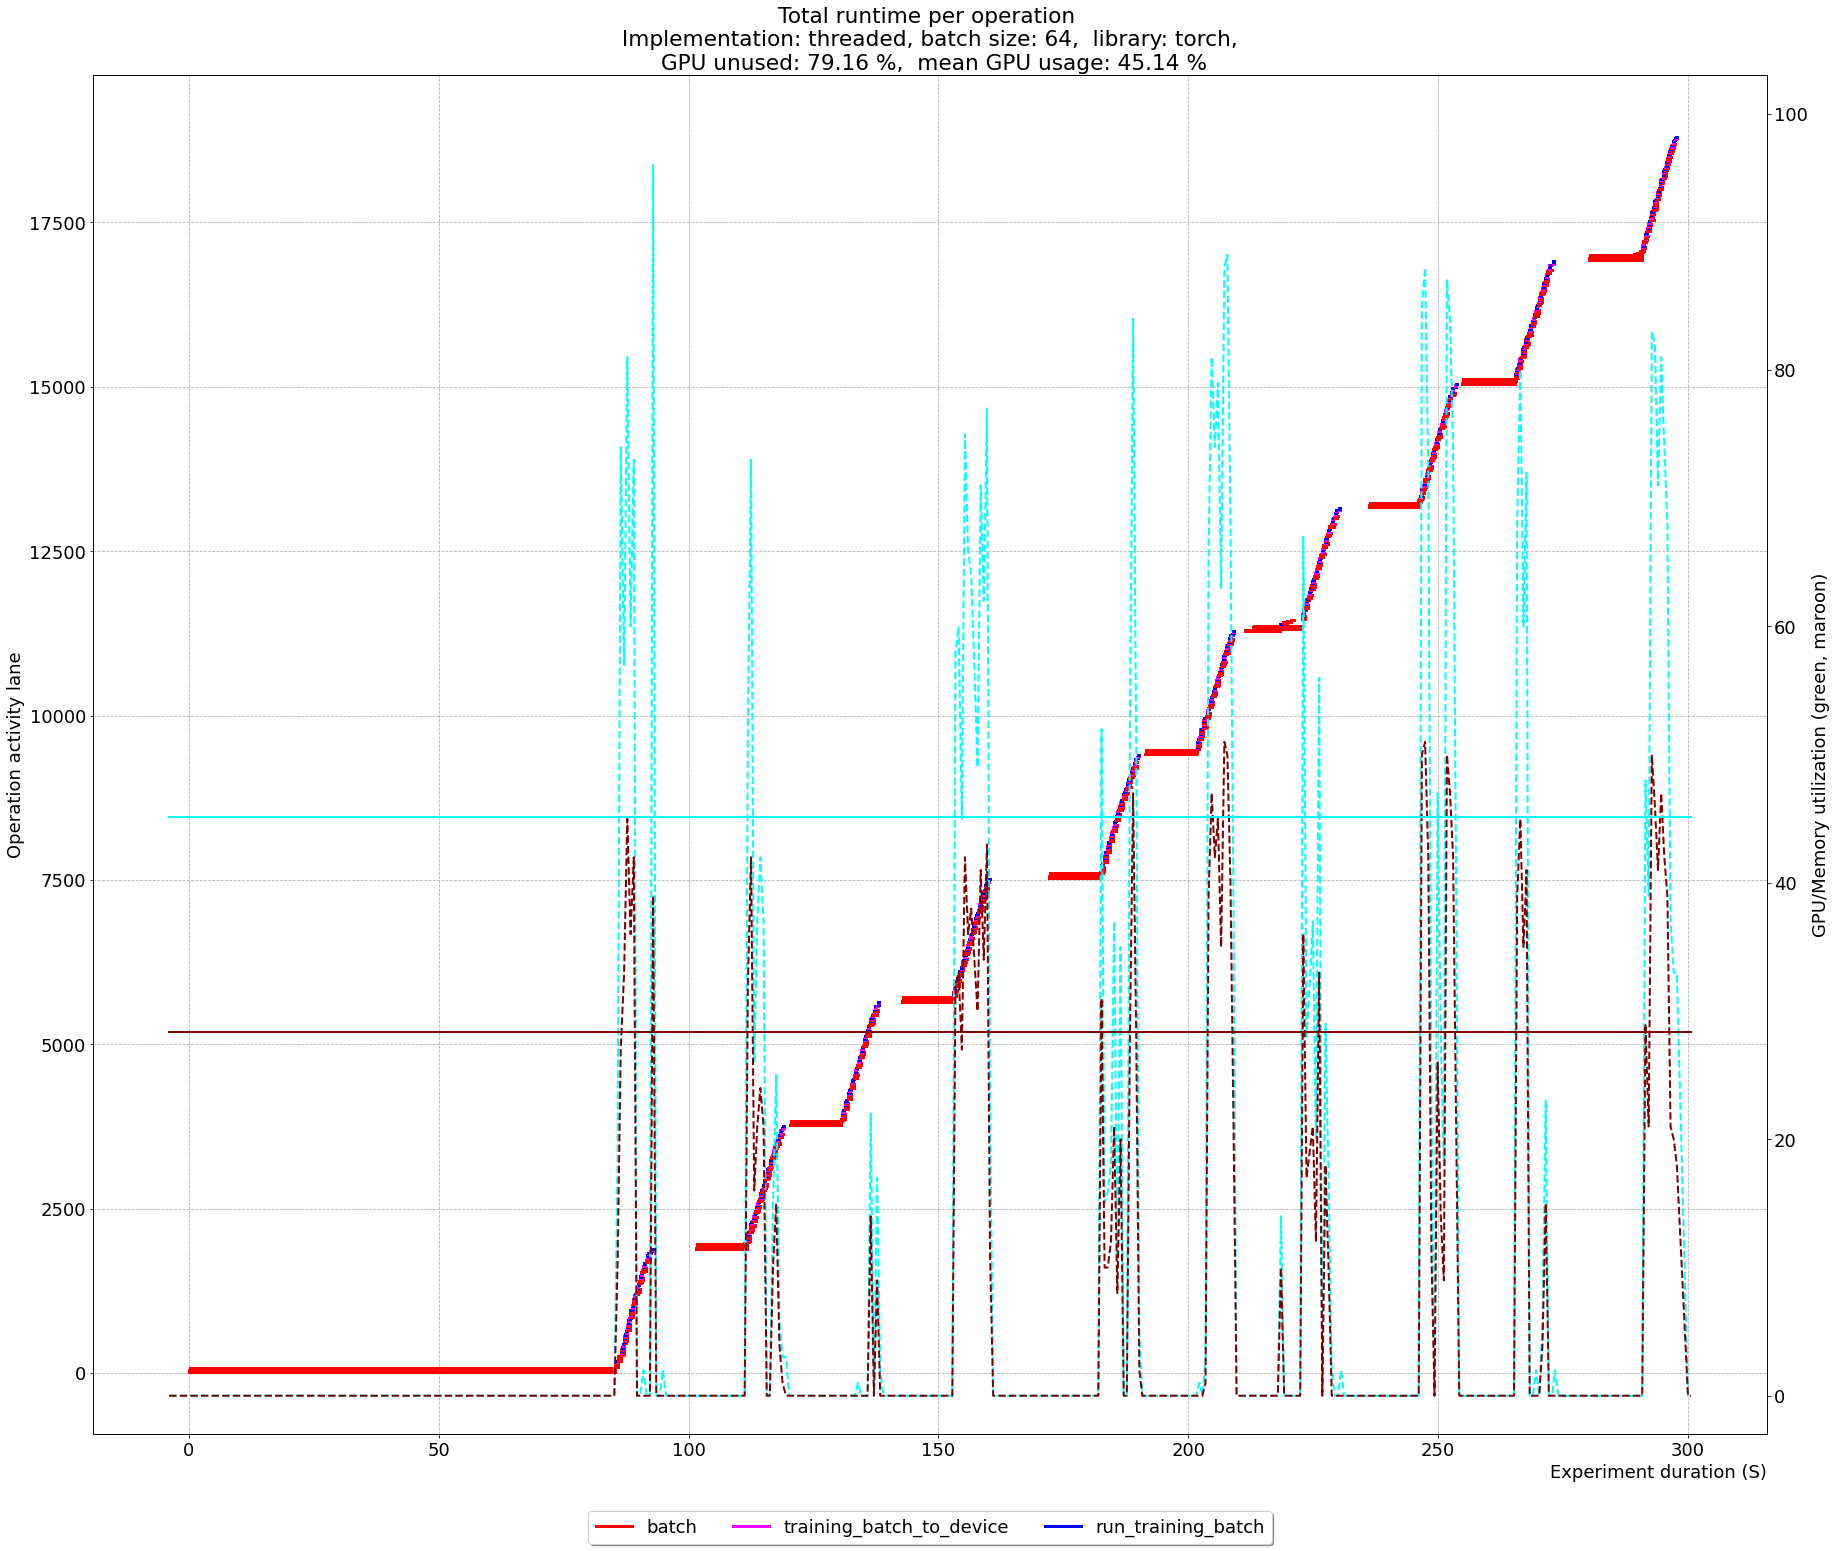

42.037593984962406 14.75


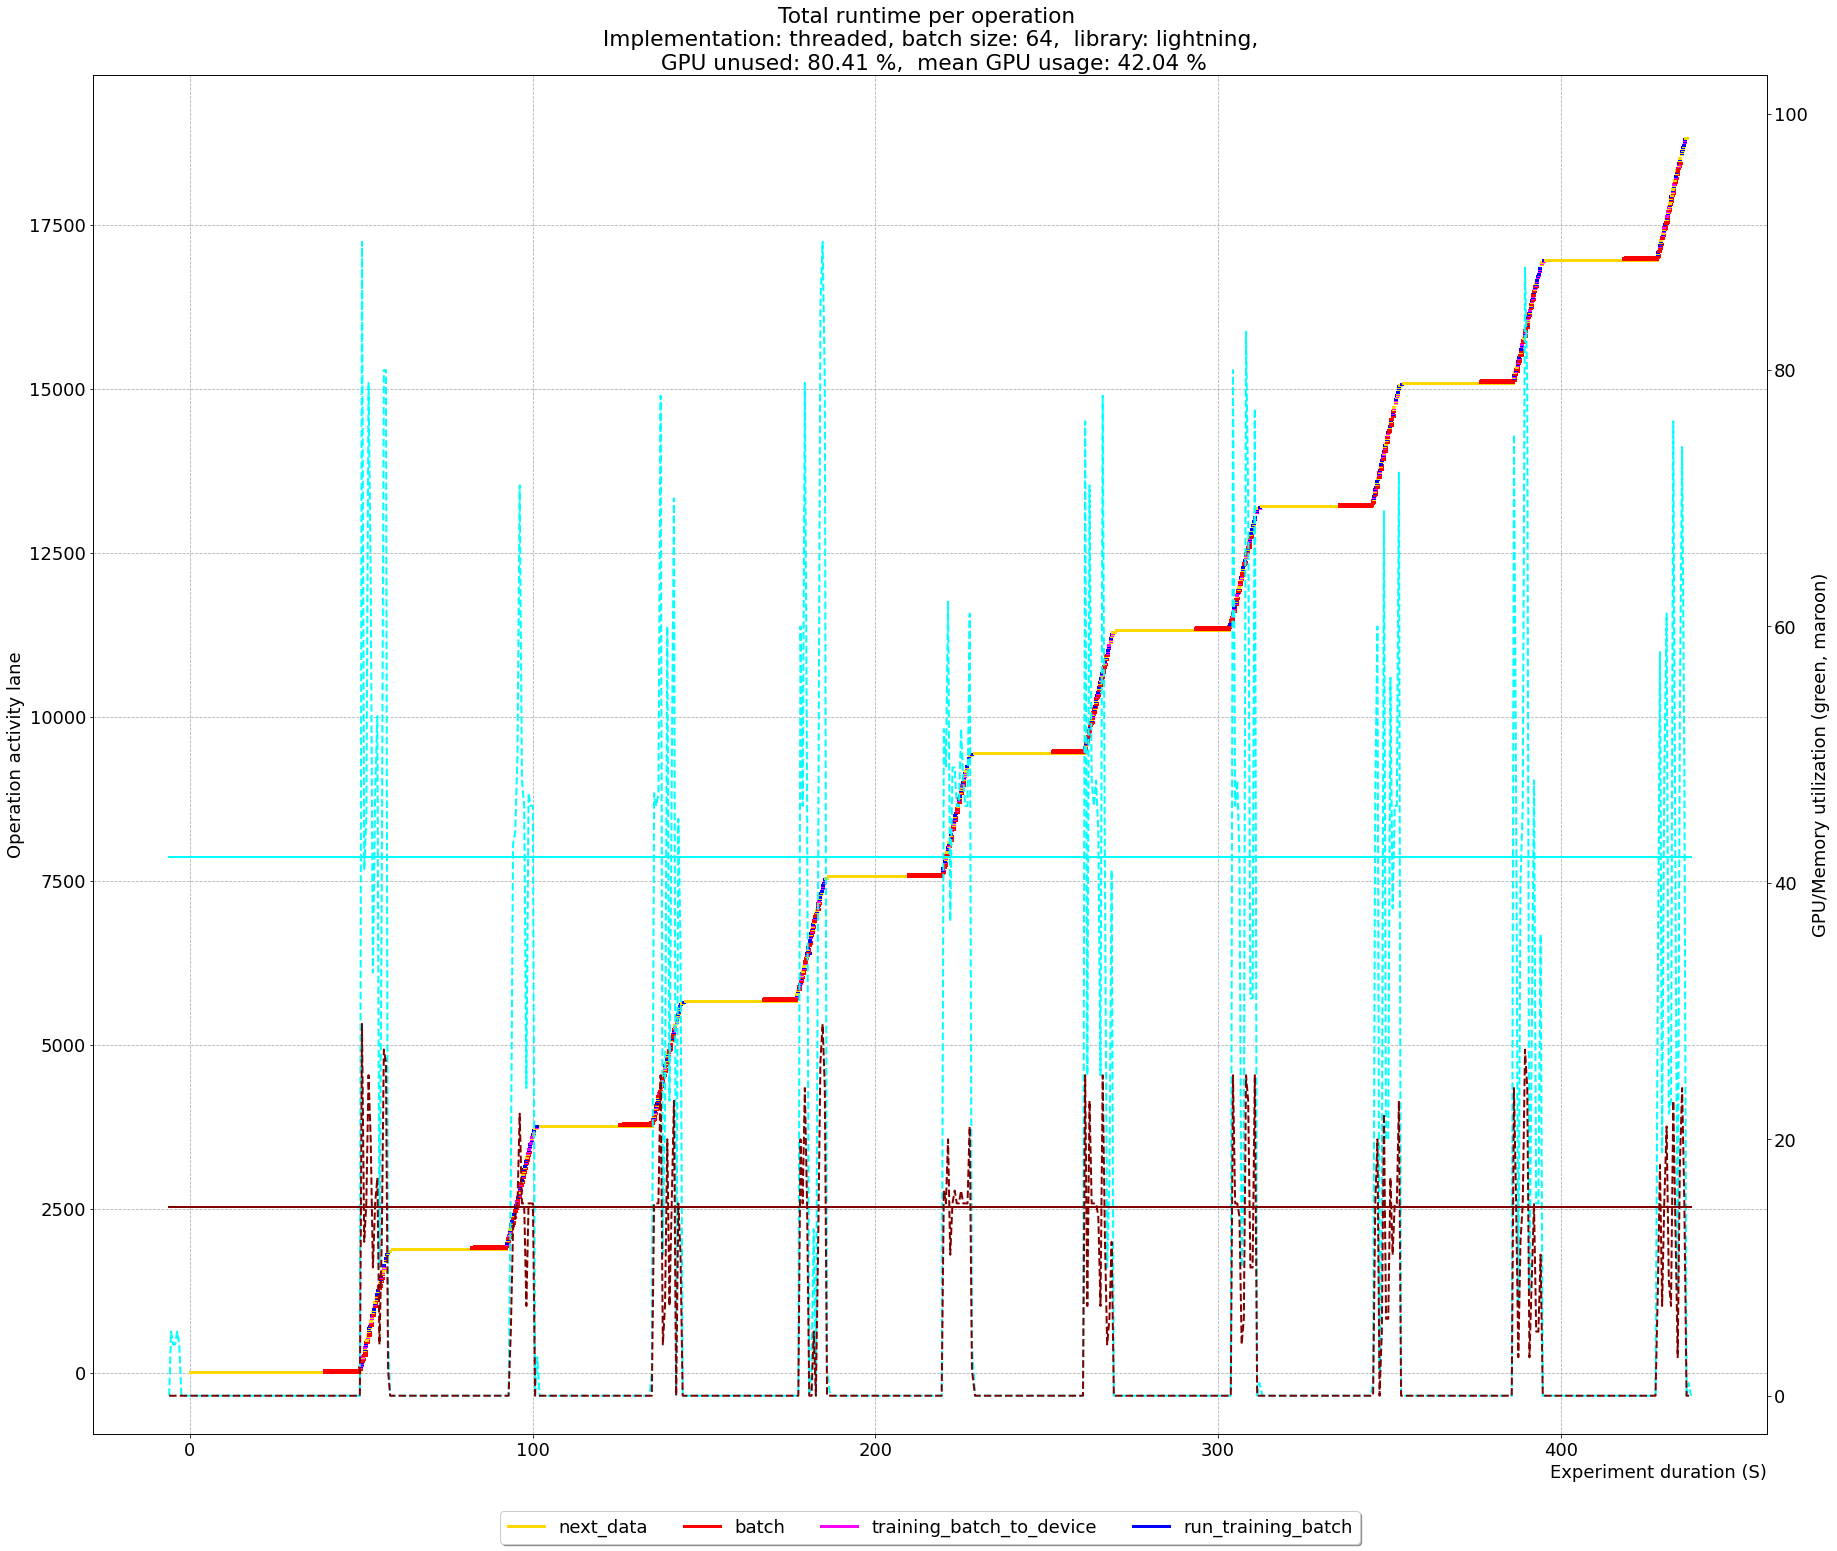

36.27058823529412 24.554054054054053


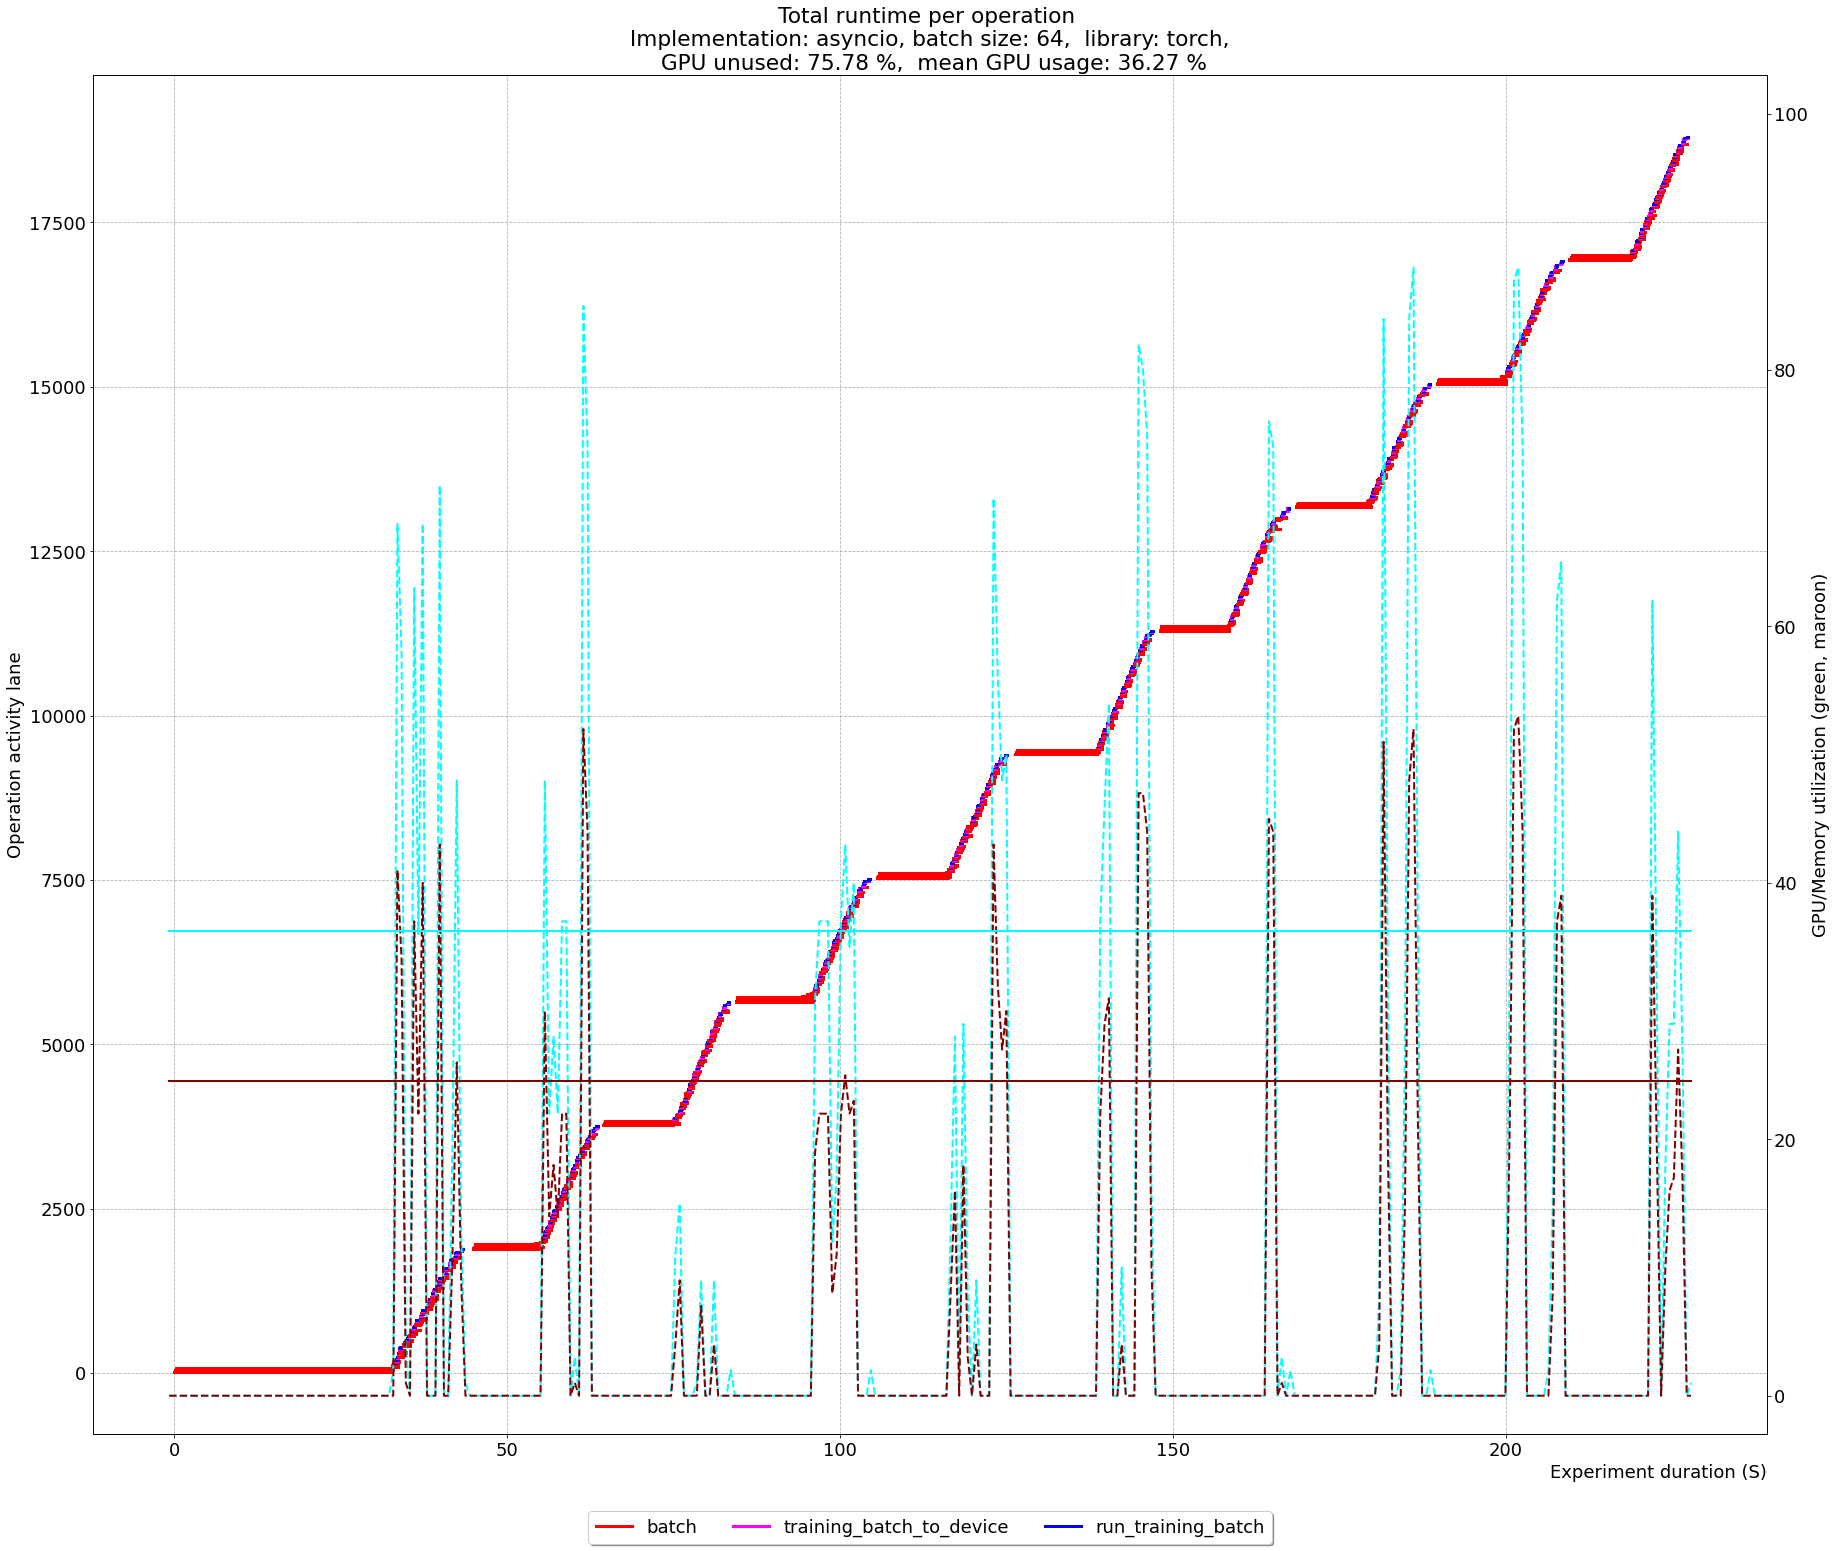

39.678082191780824 13.544117647058824


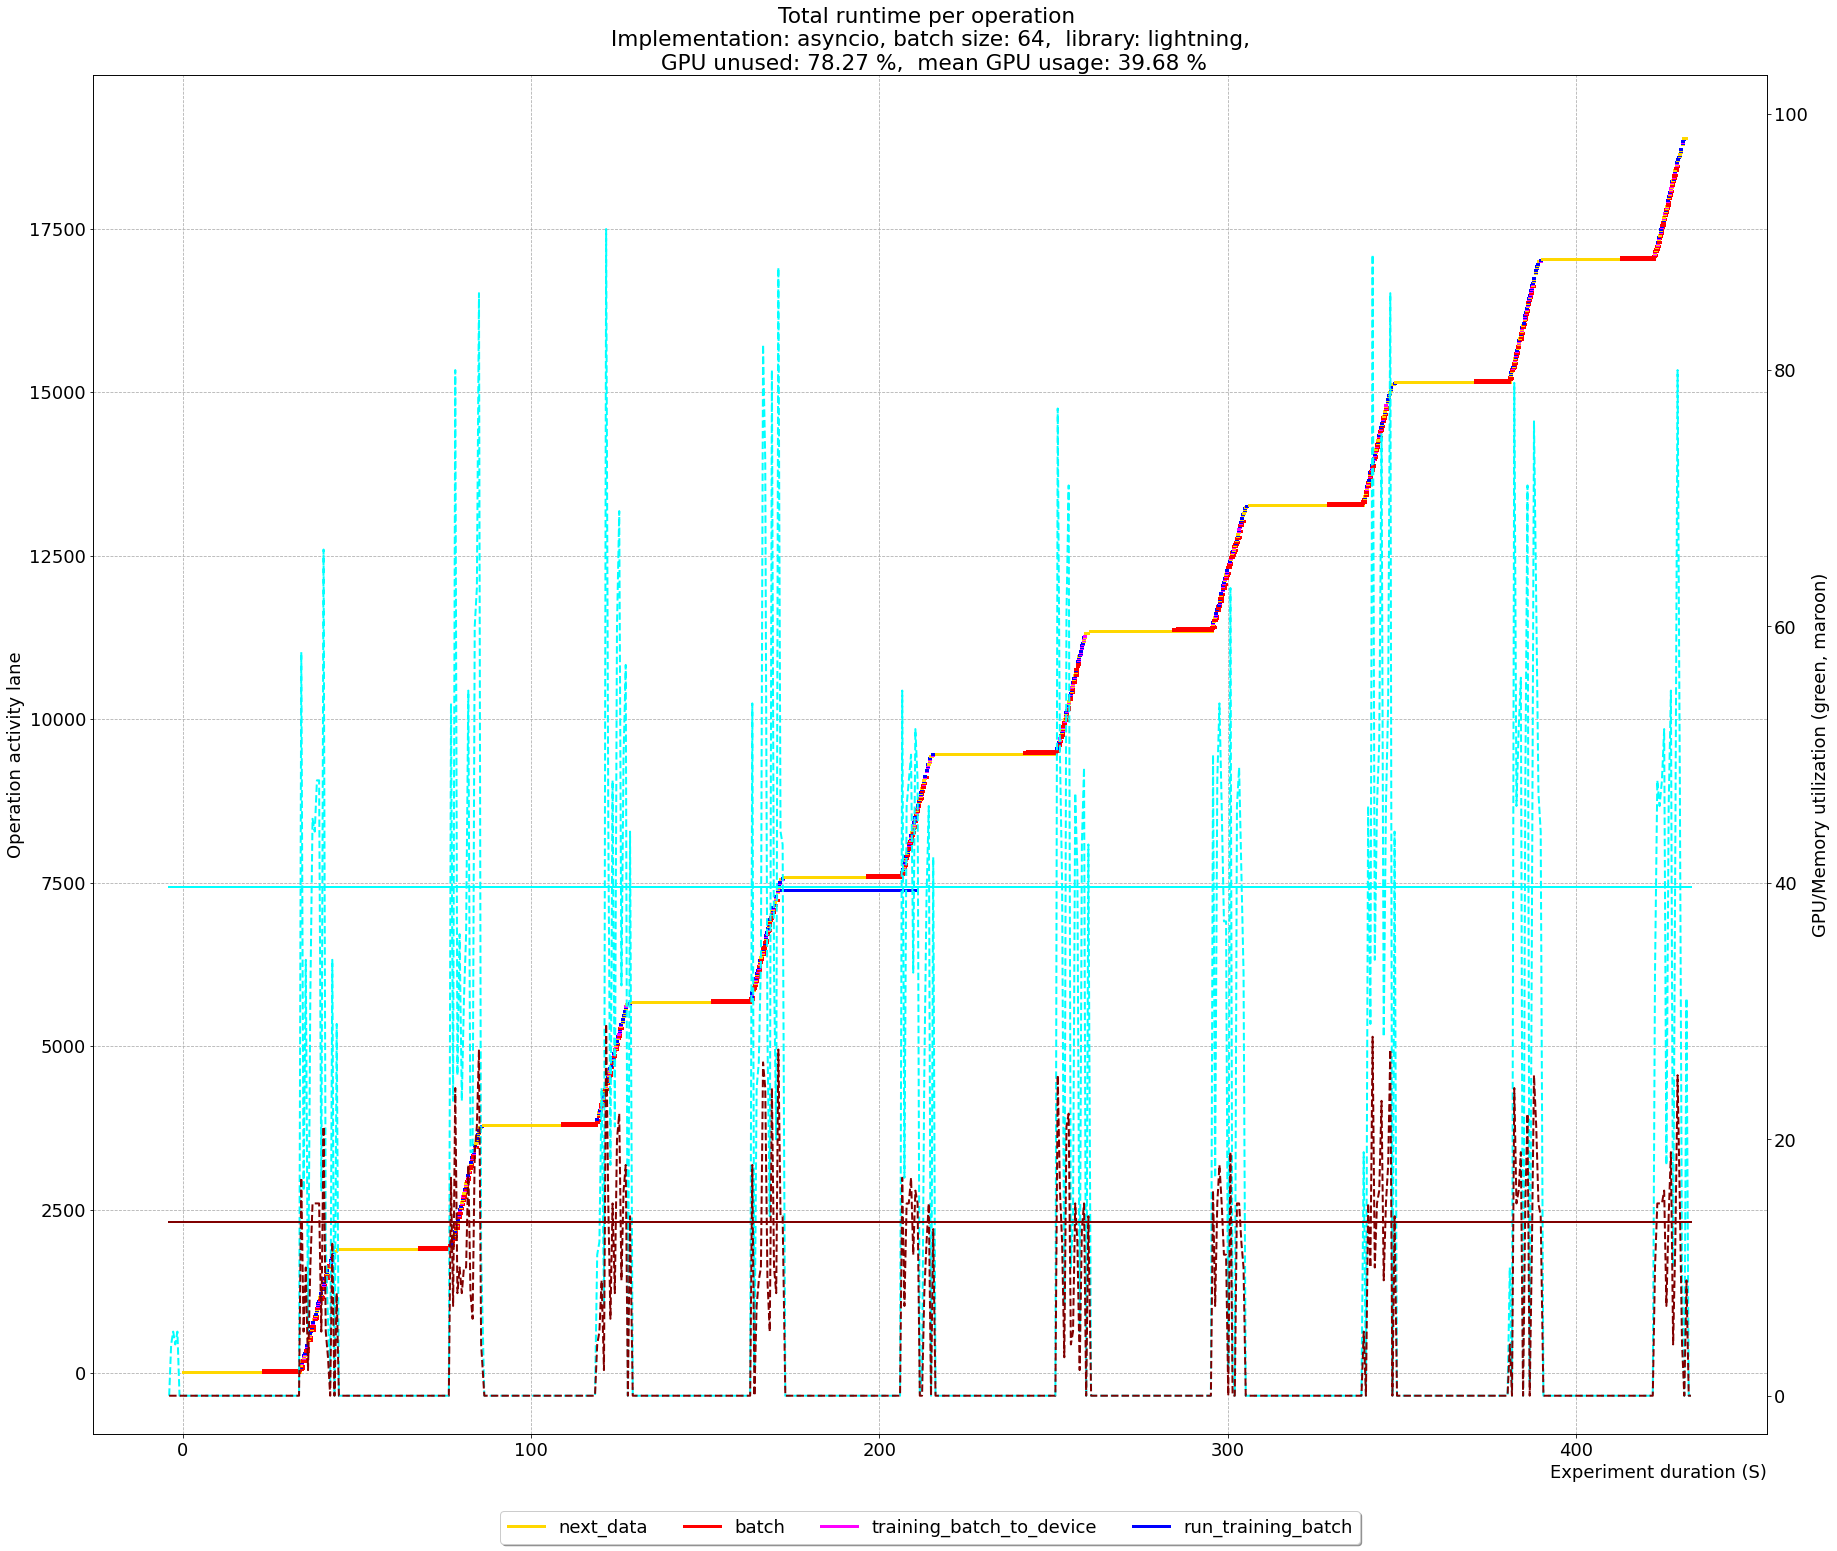

44.16949152542373 25.666666666666668


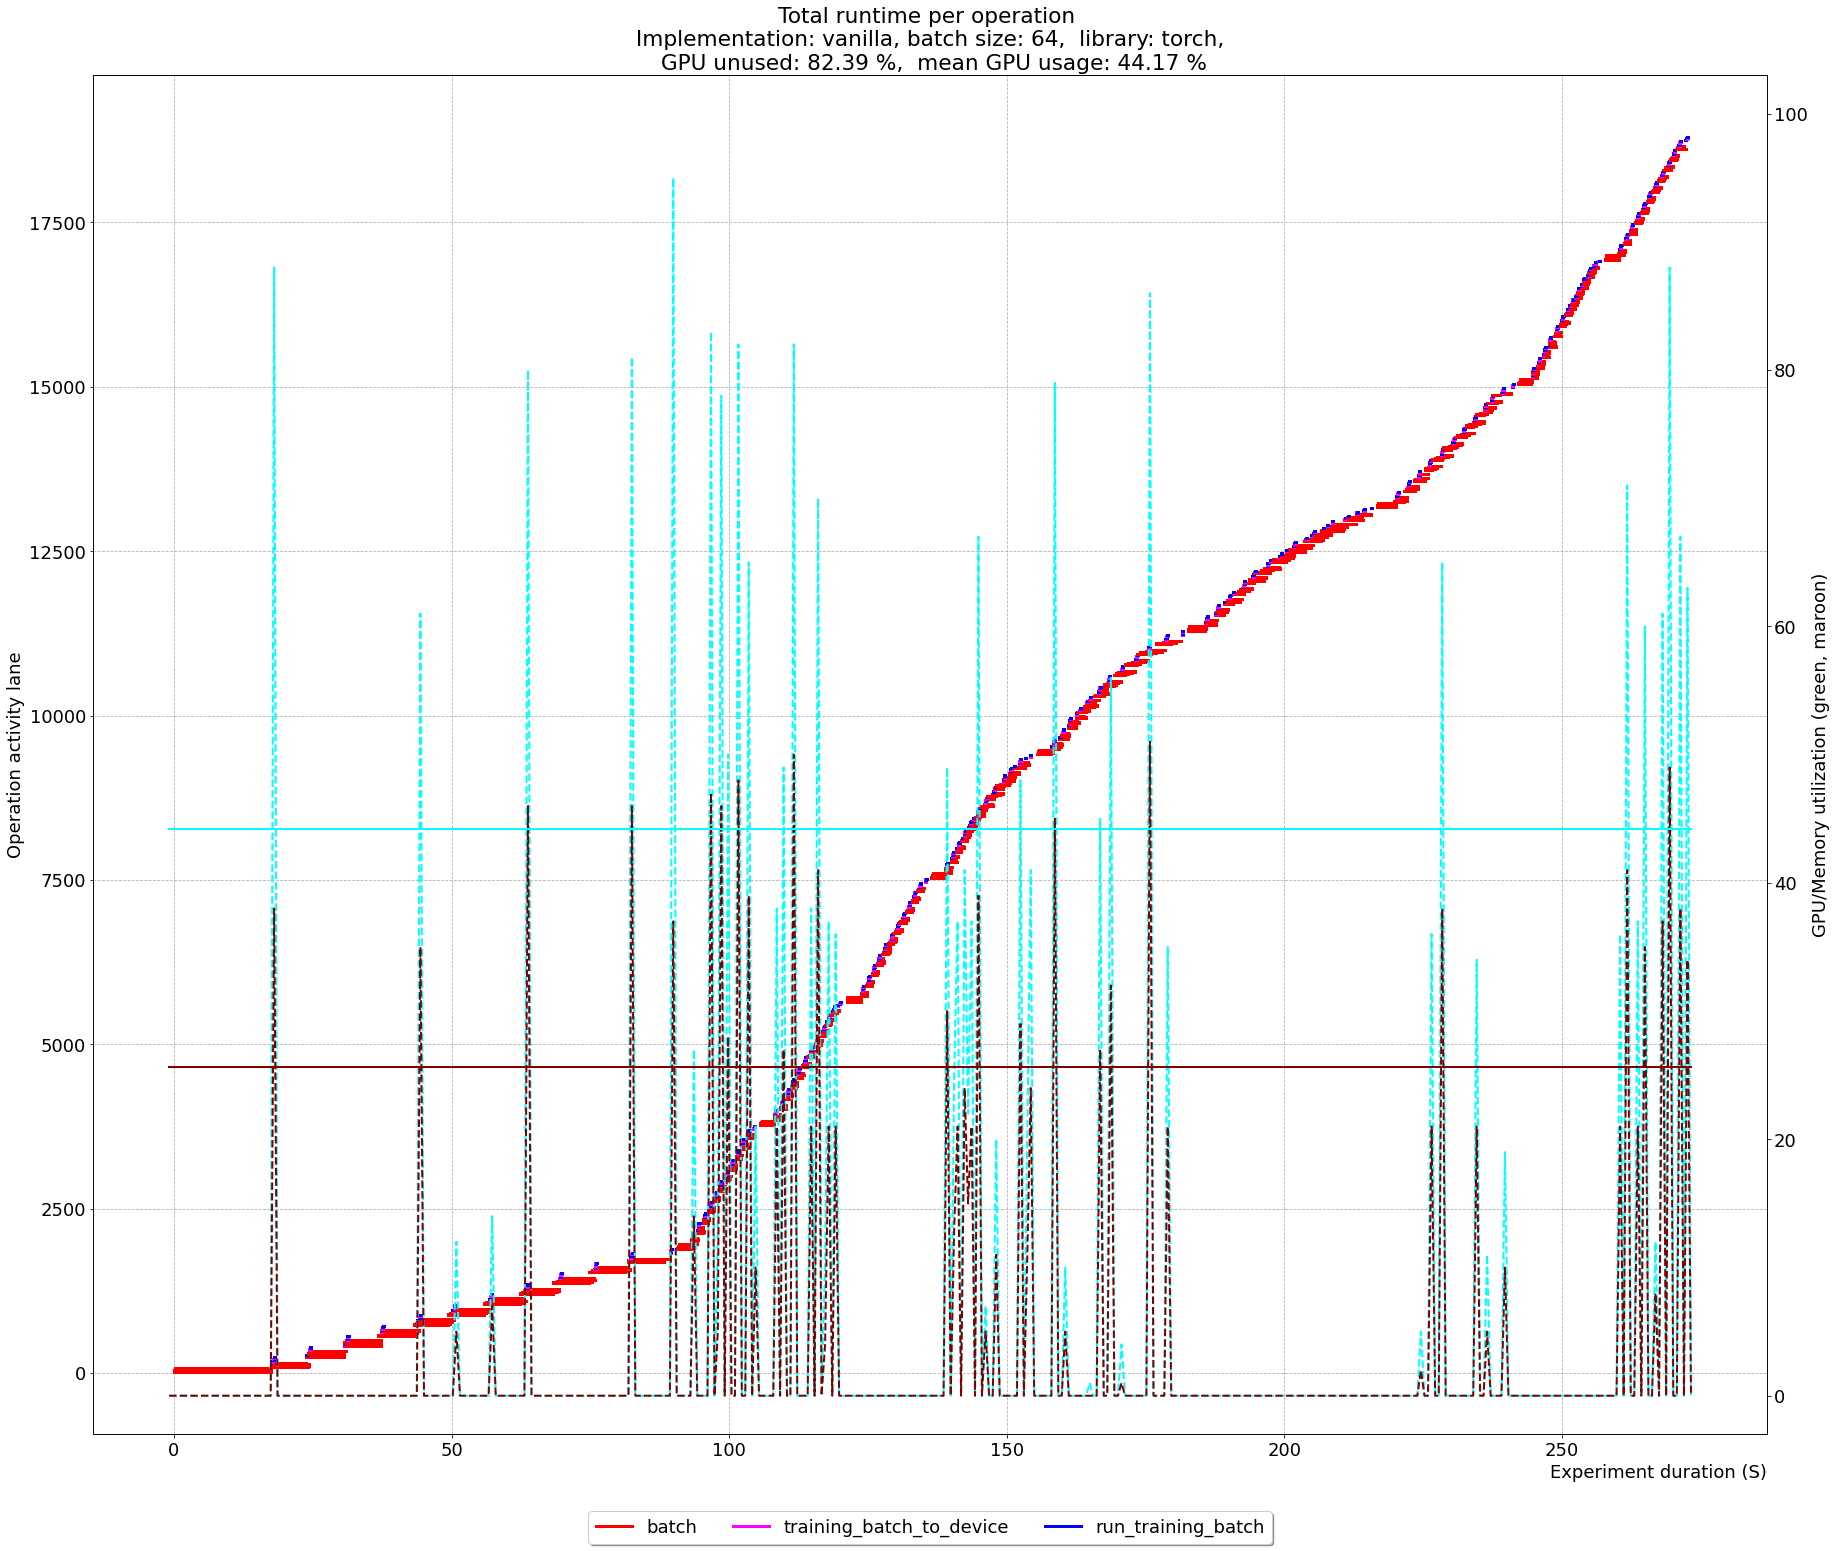

29.679425837320576 10.32972972972973


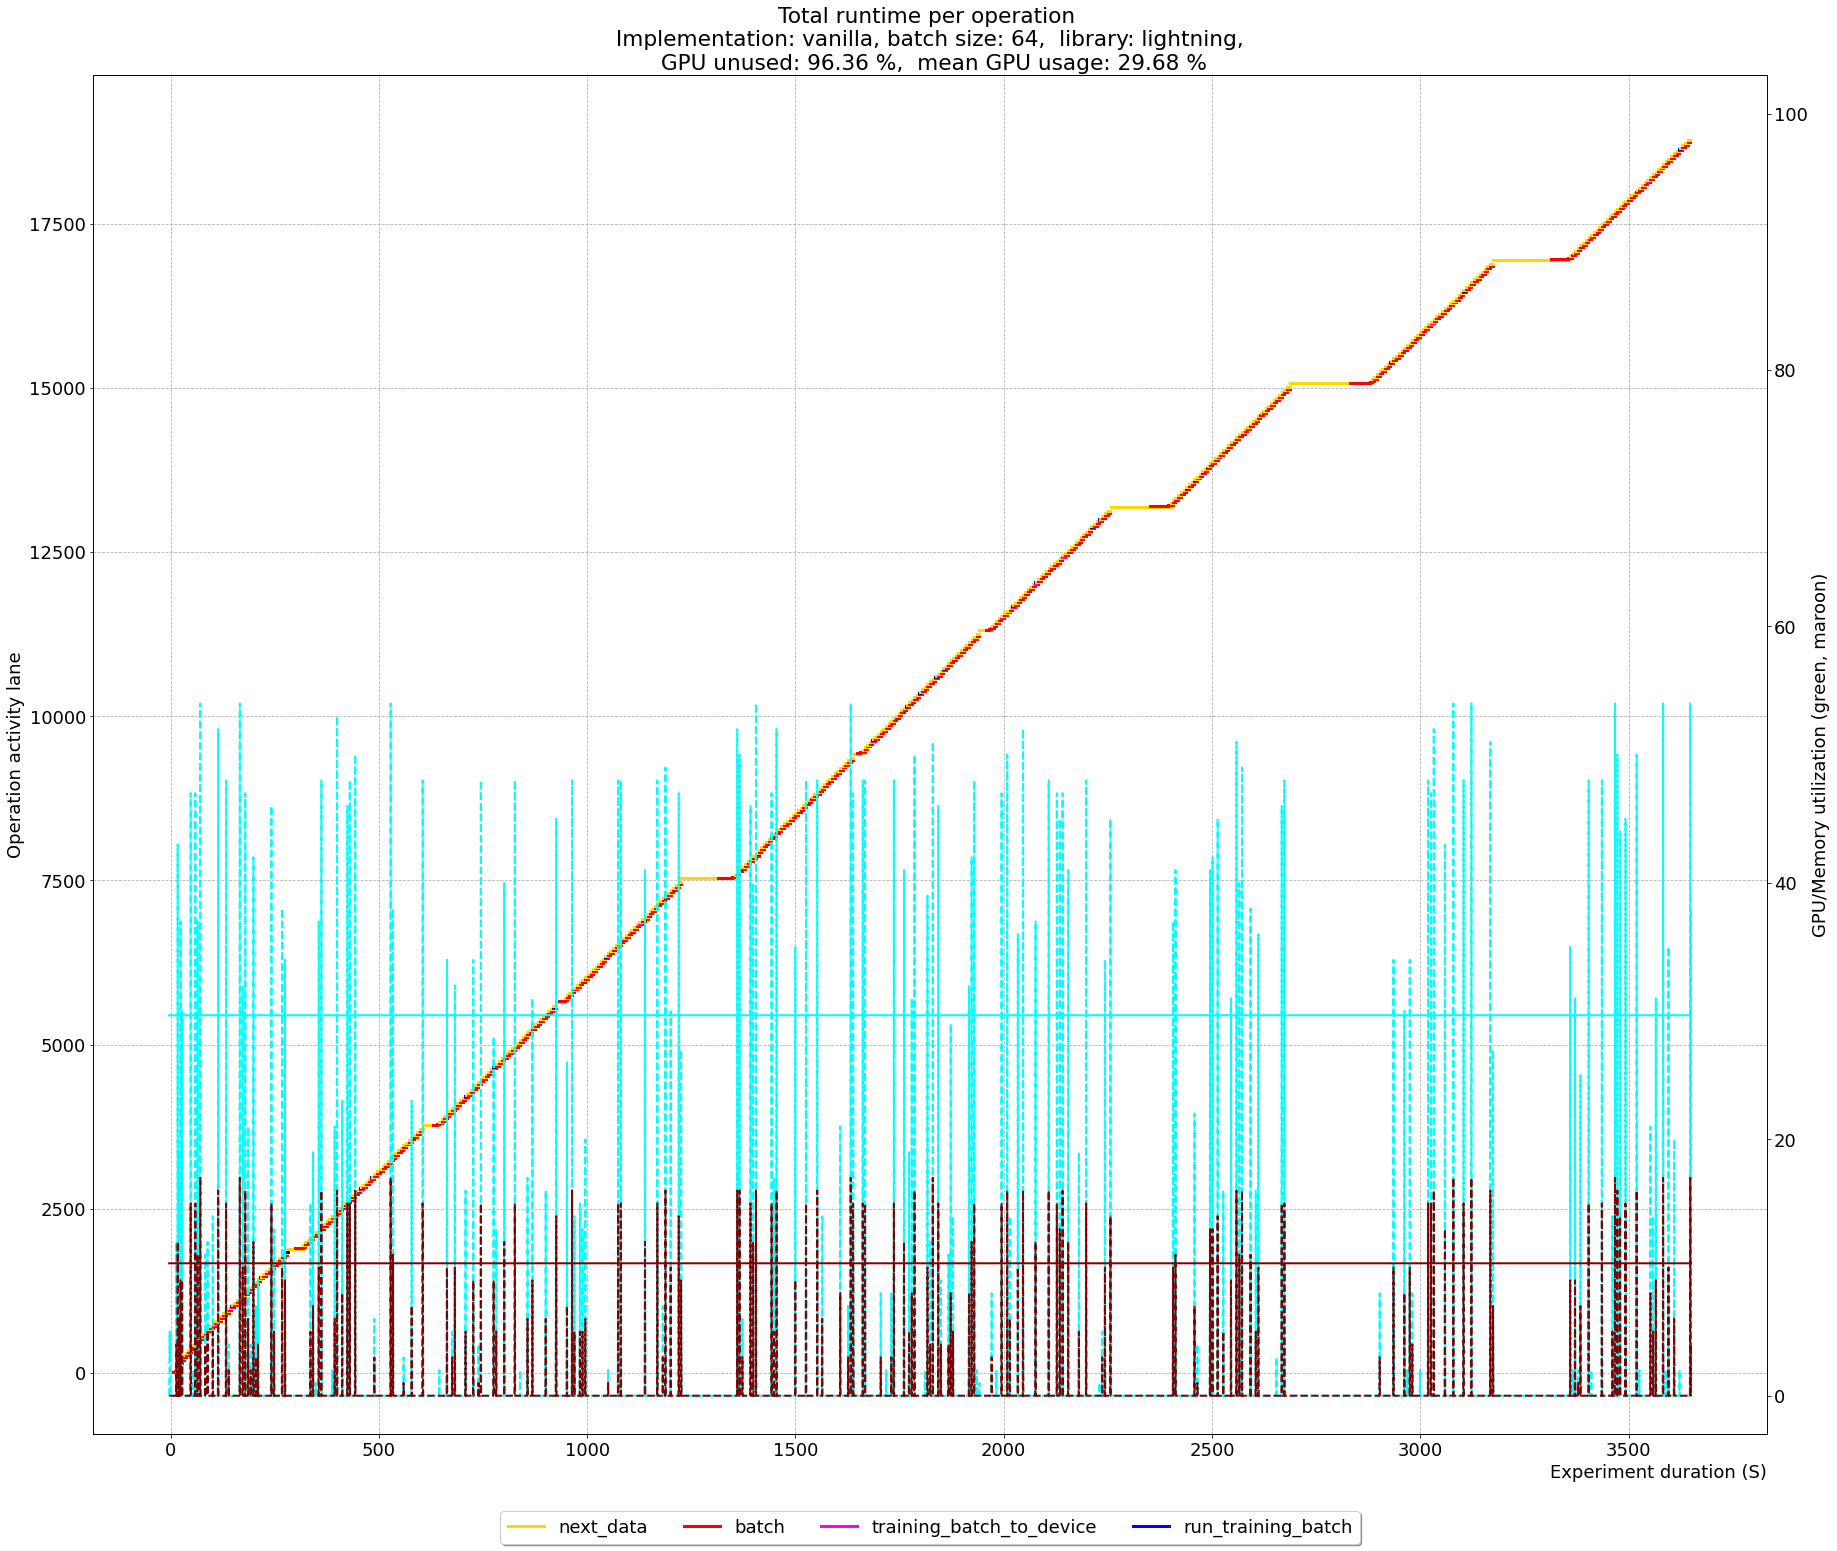

In [40]:
returns_s3 = []
for run in sorted(unique_runs_s3):
    df = df_dataloader_s3[df_dataloader_s3["run"]==run]
    dfgpu = df_gpuutil_s3[df_gpuutil_s3["run"]==run]
    returns_s3.append(show_timelines_with_gpu(df, dfgpu, run, False, True, False, 2))

61.52238805970149 34.203125


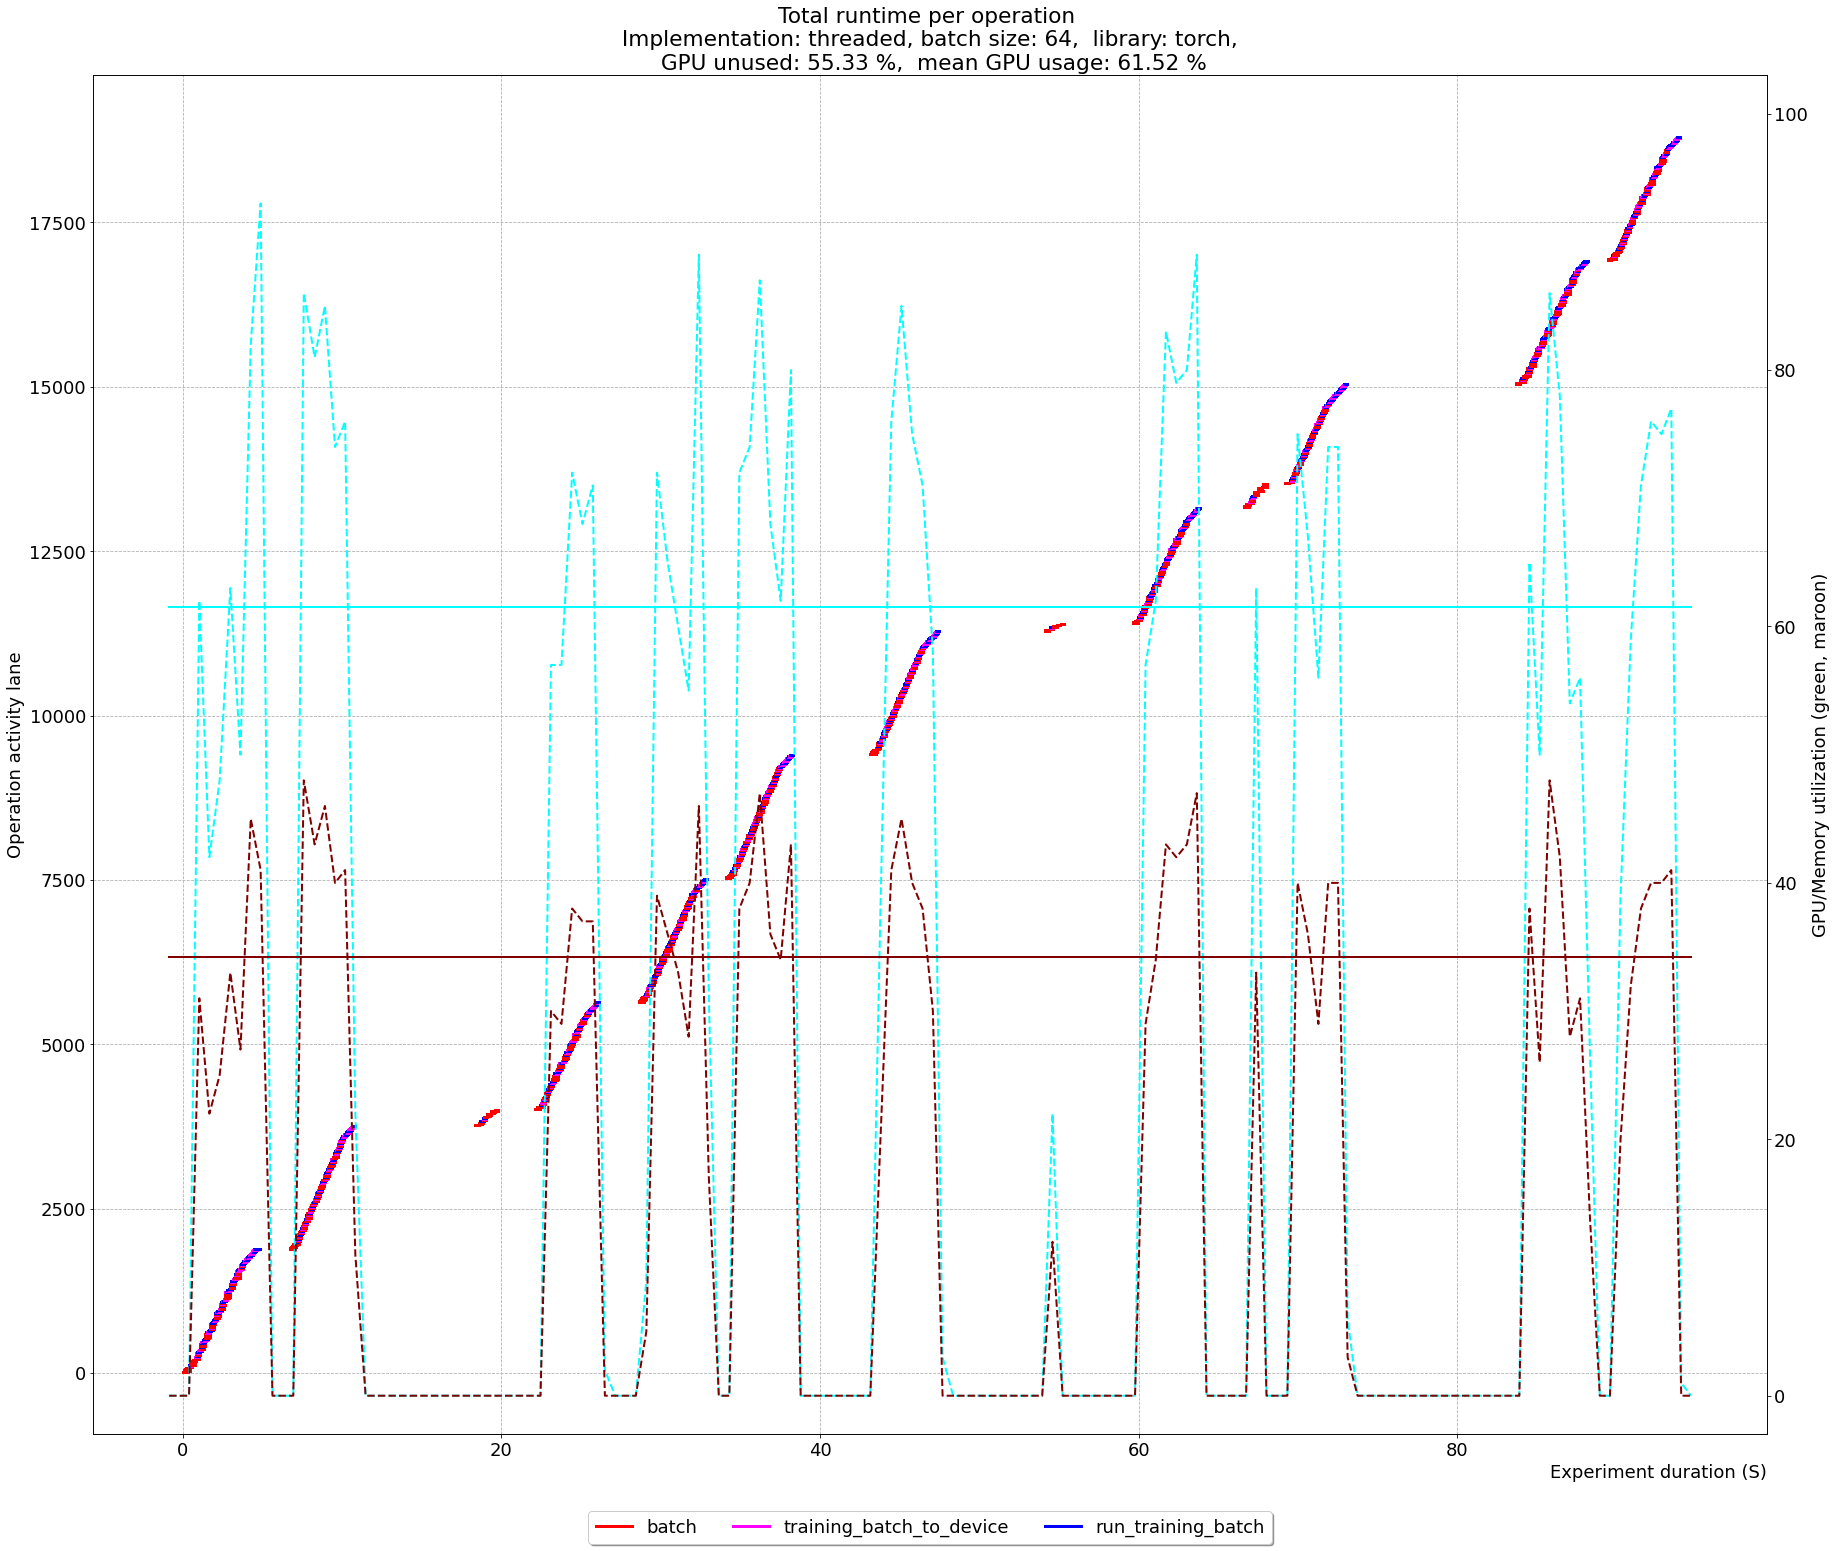

47.47457627118644 16.26605504587156


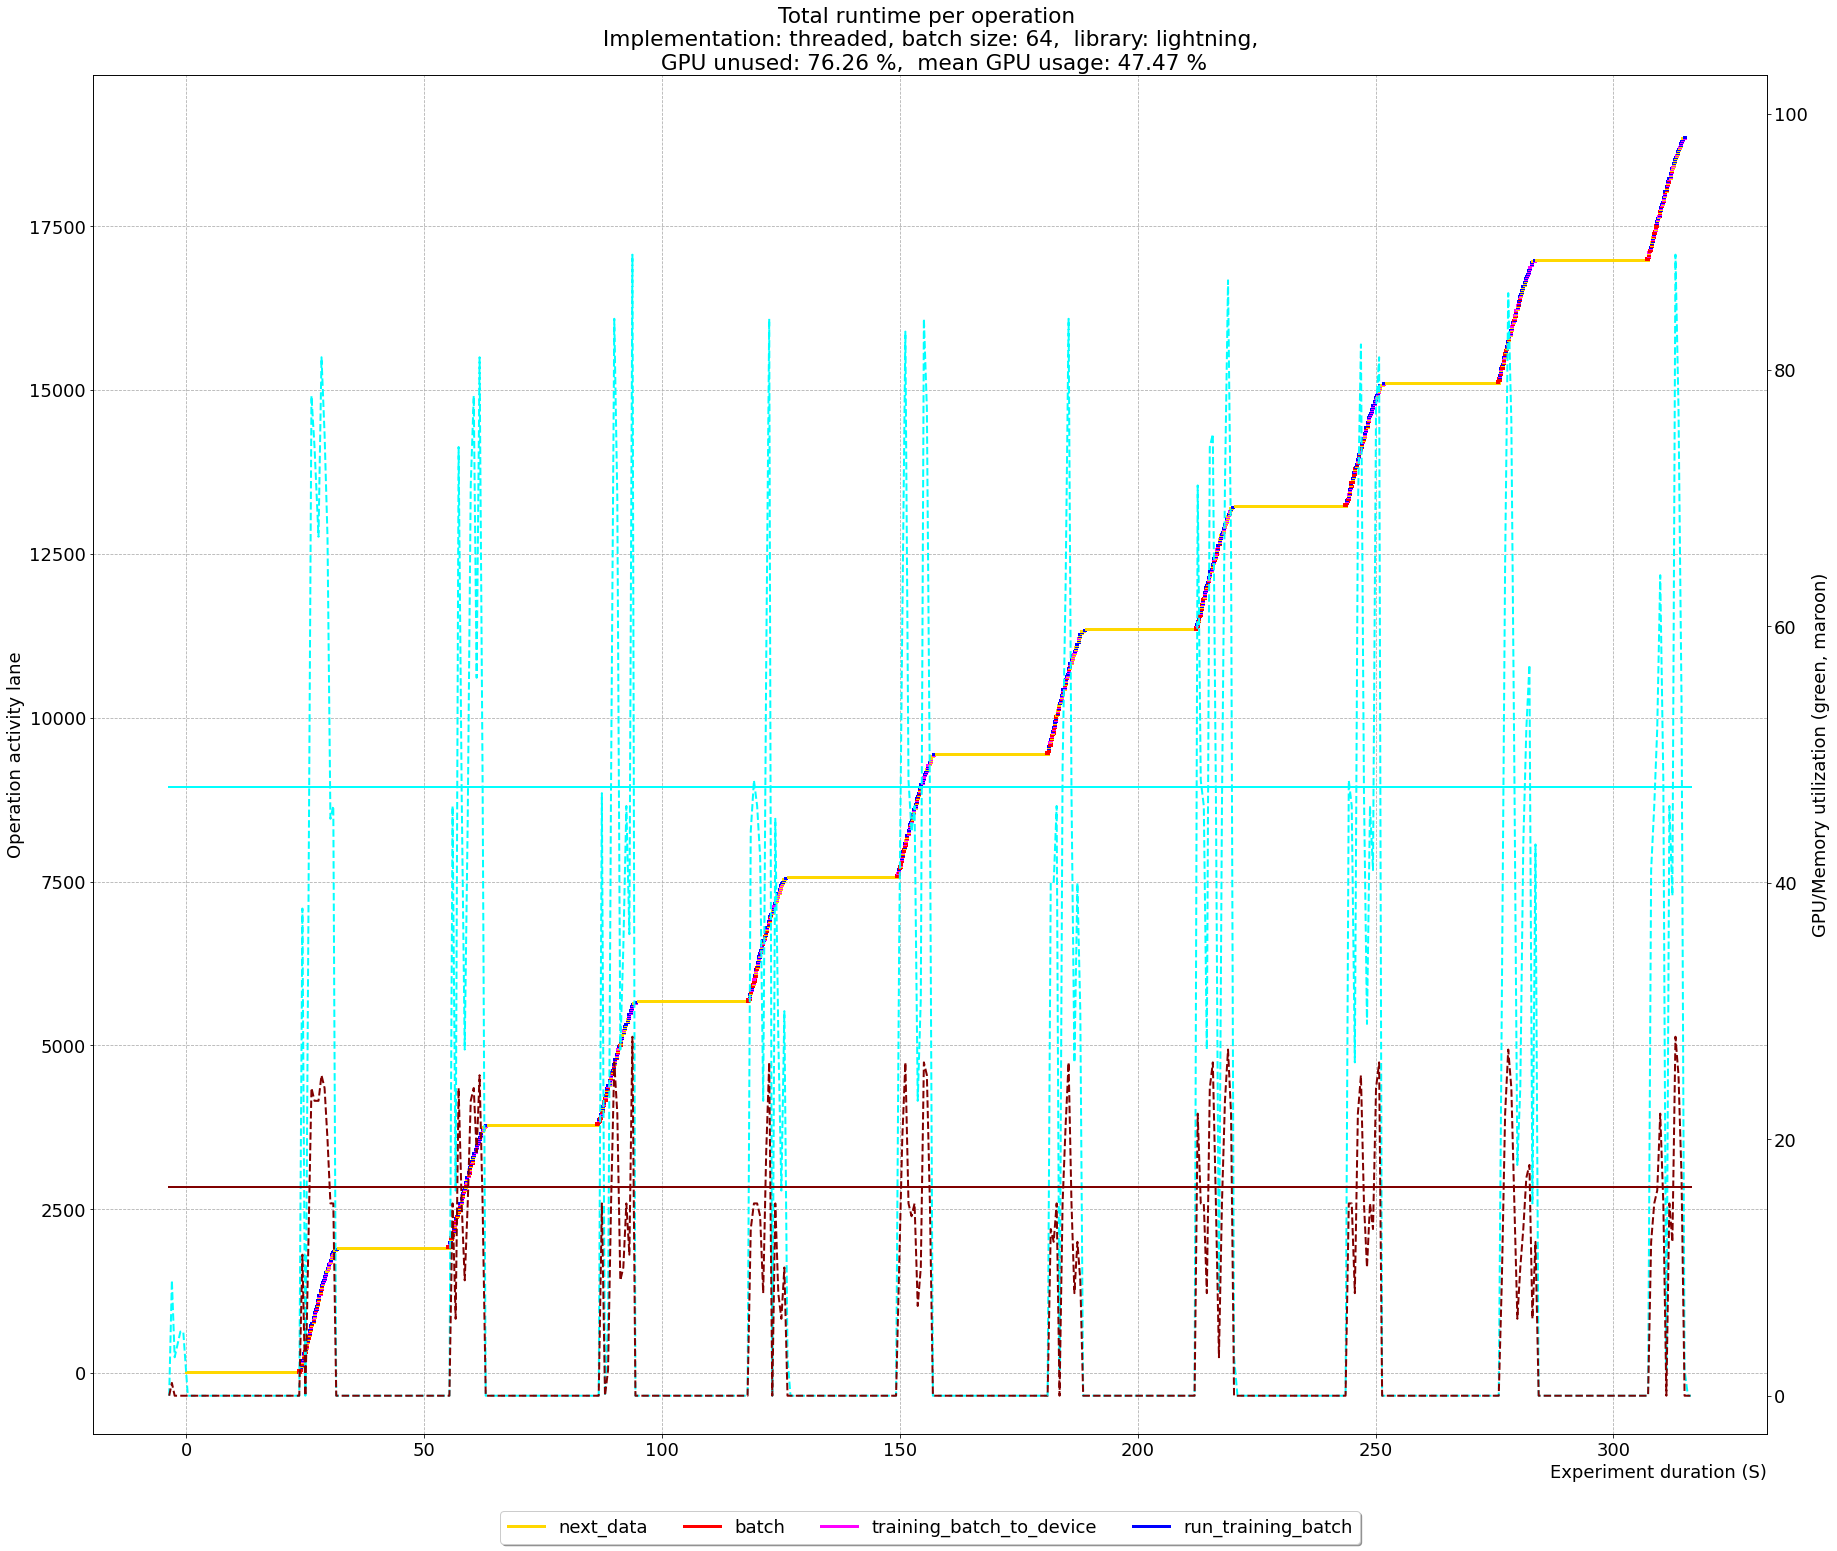

63.40909090909091 37.285714285714285


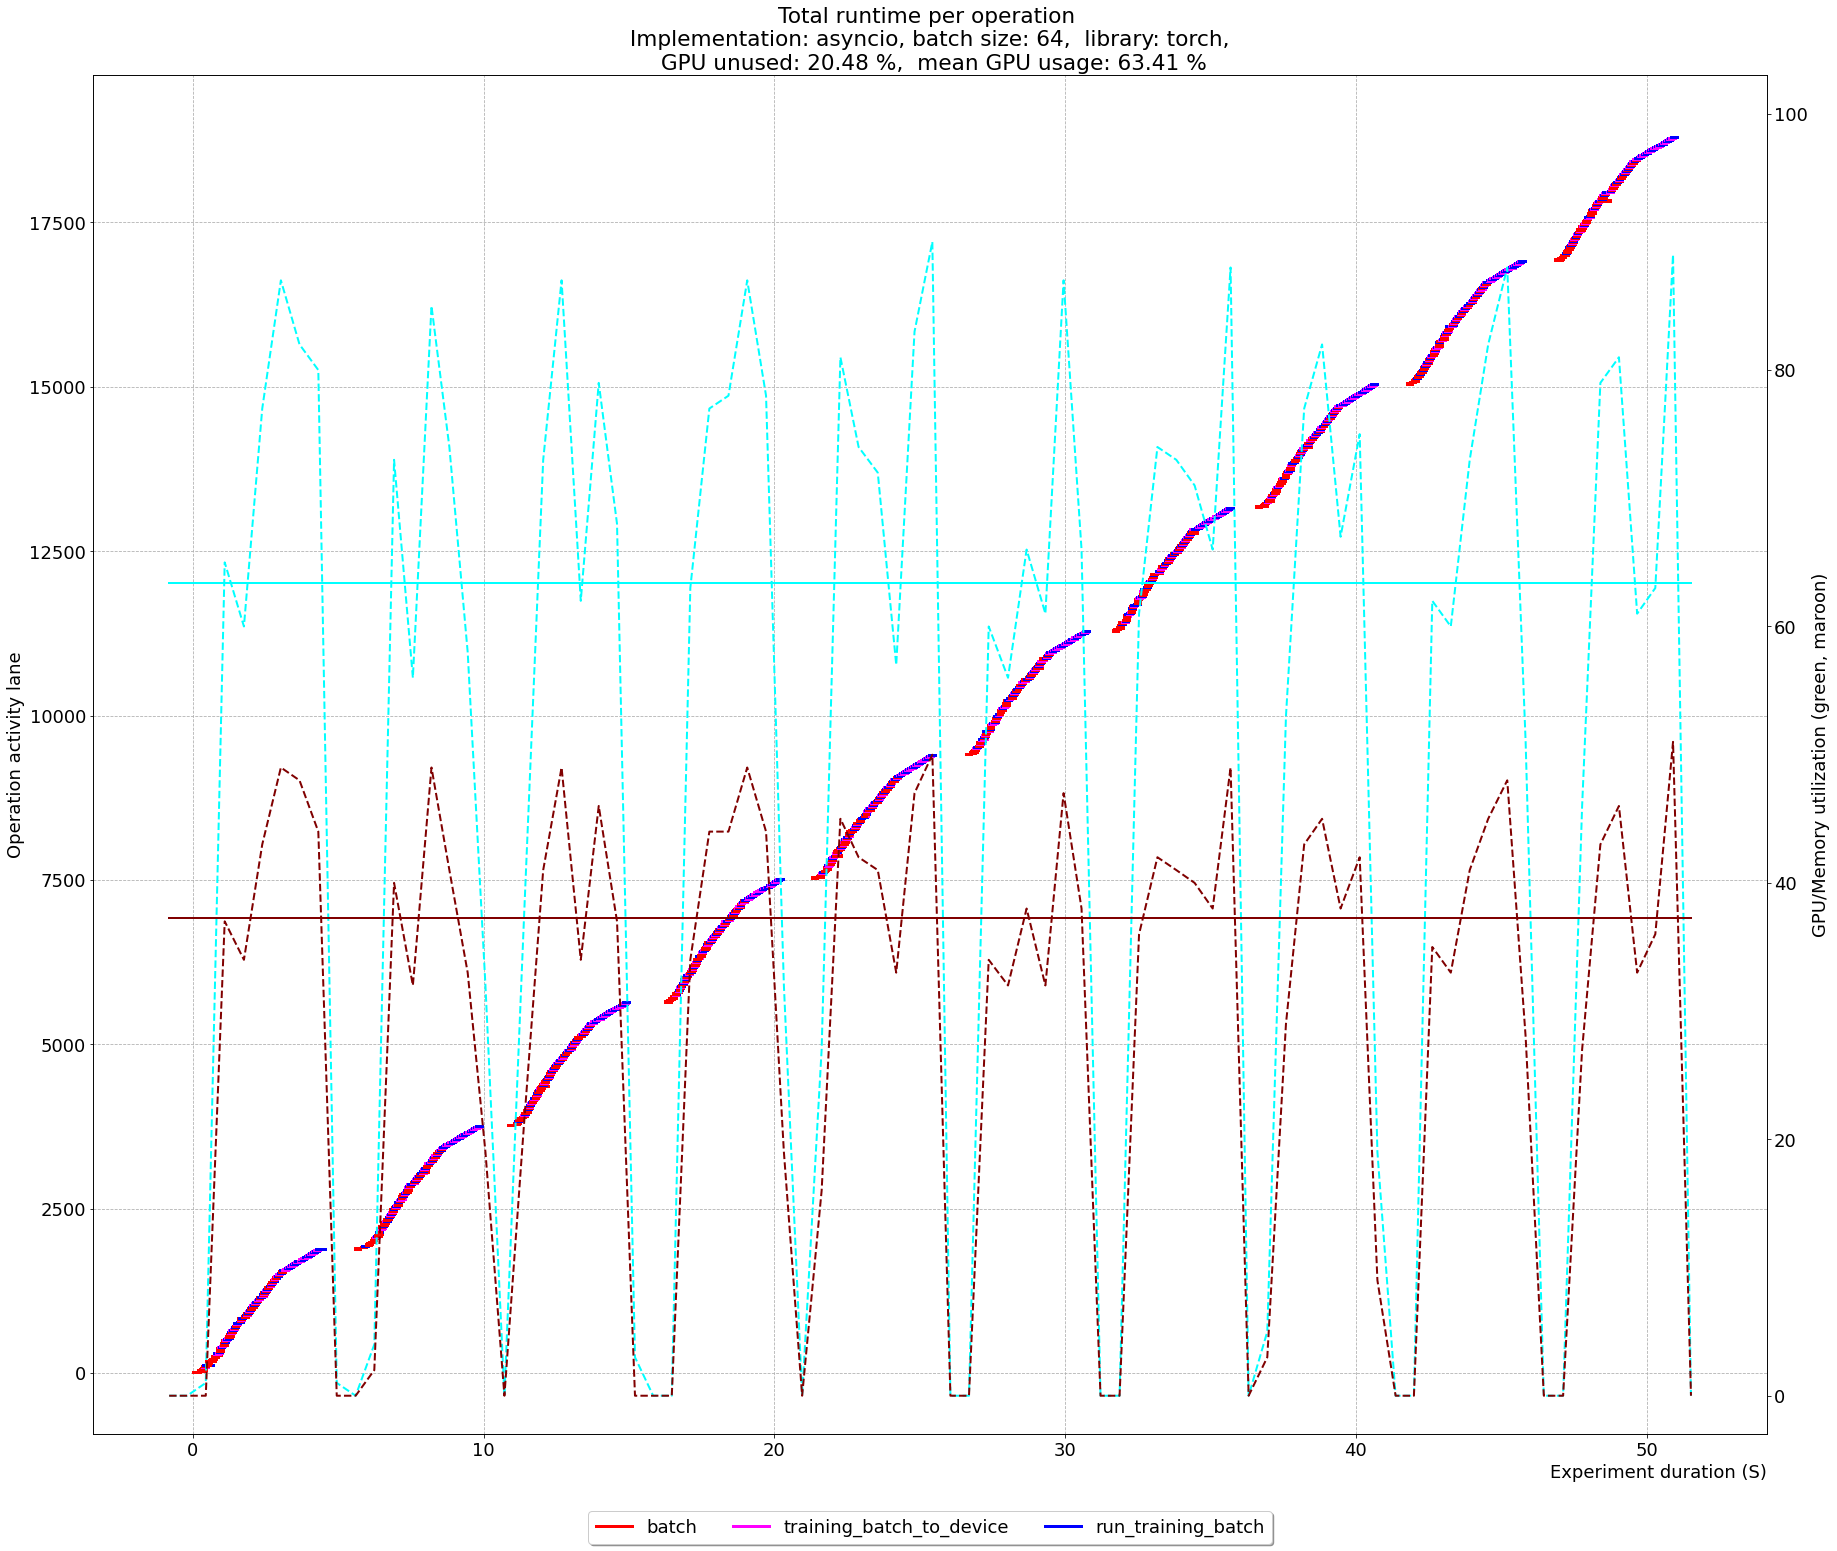

44.88095238095238 15.23076923076923


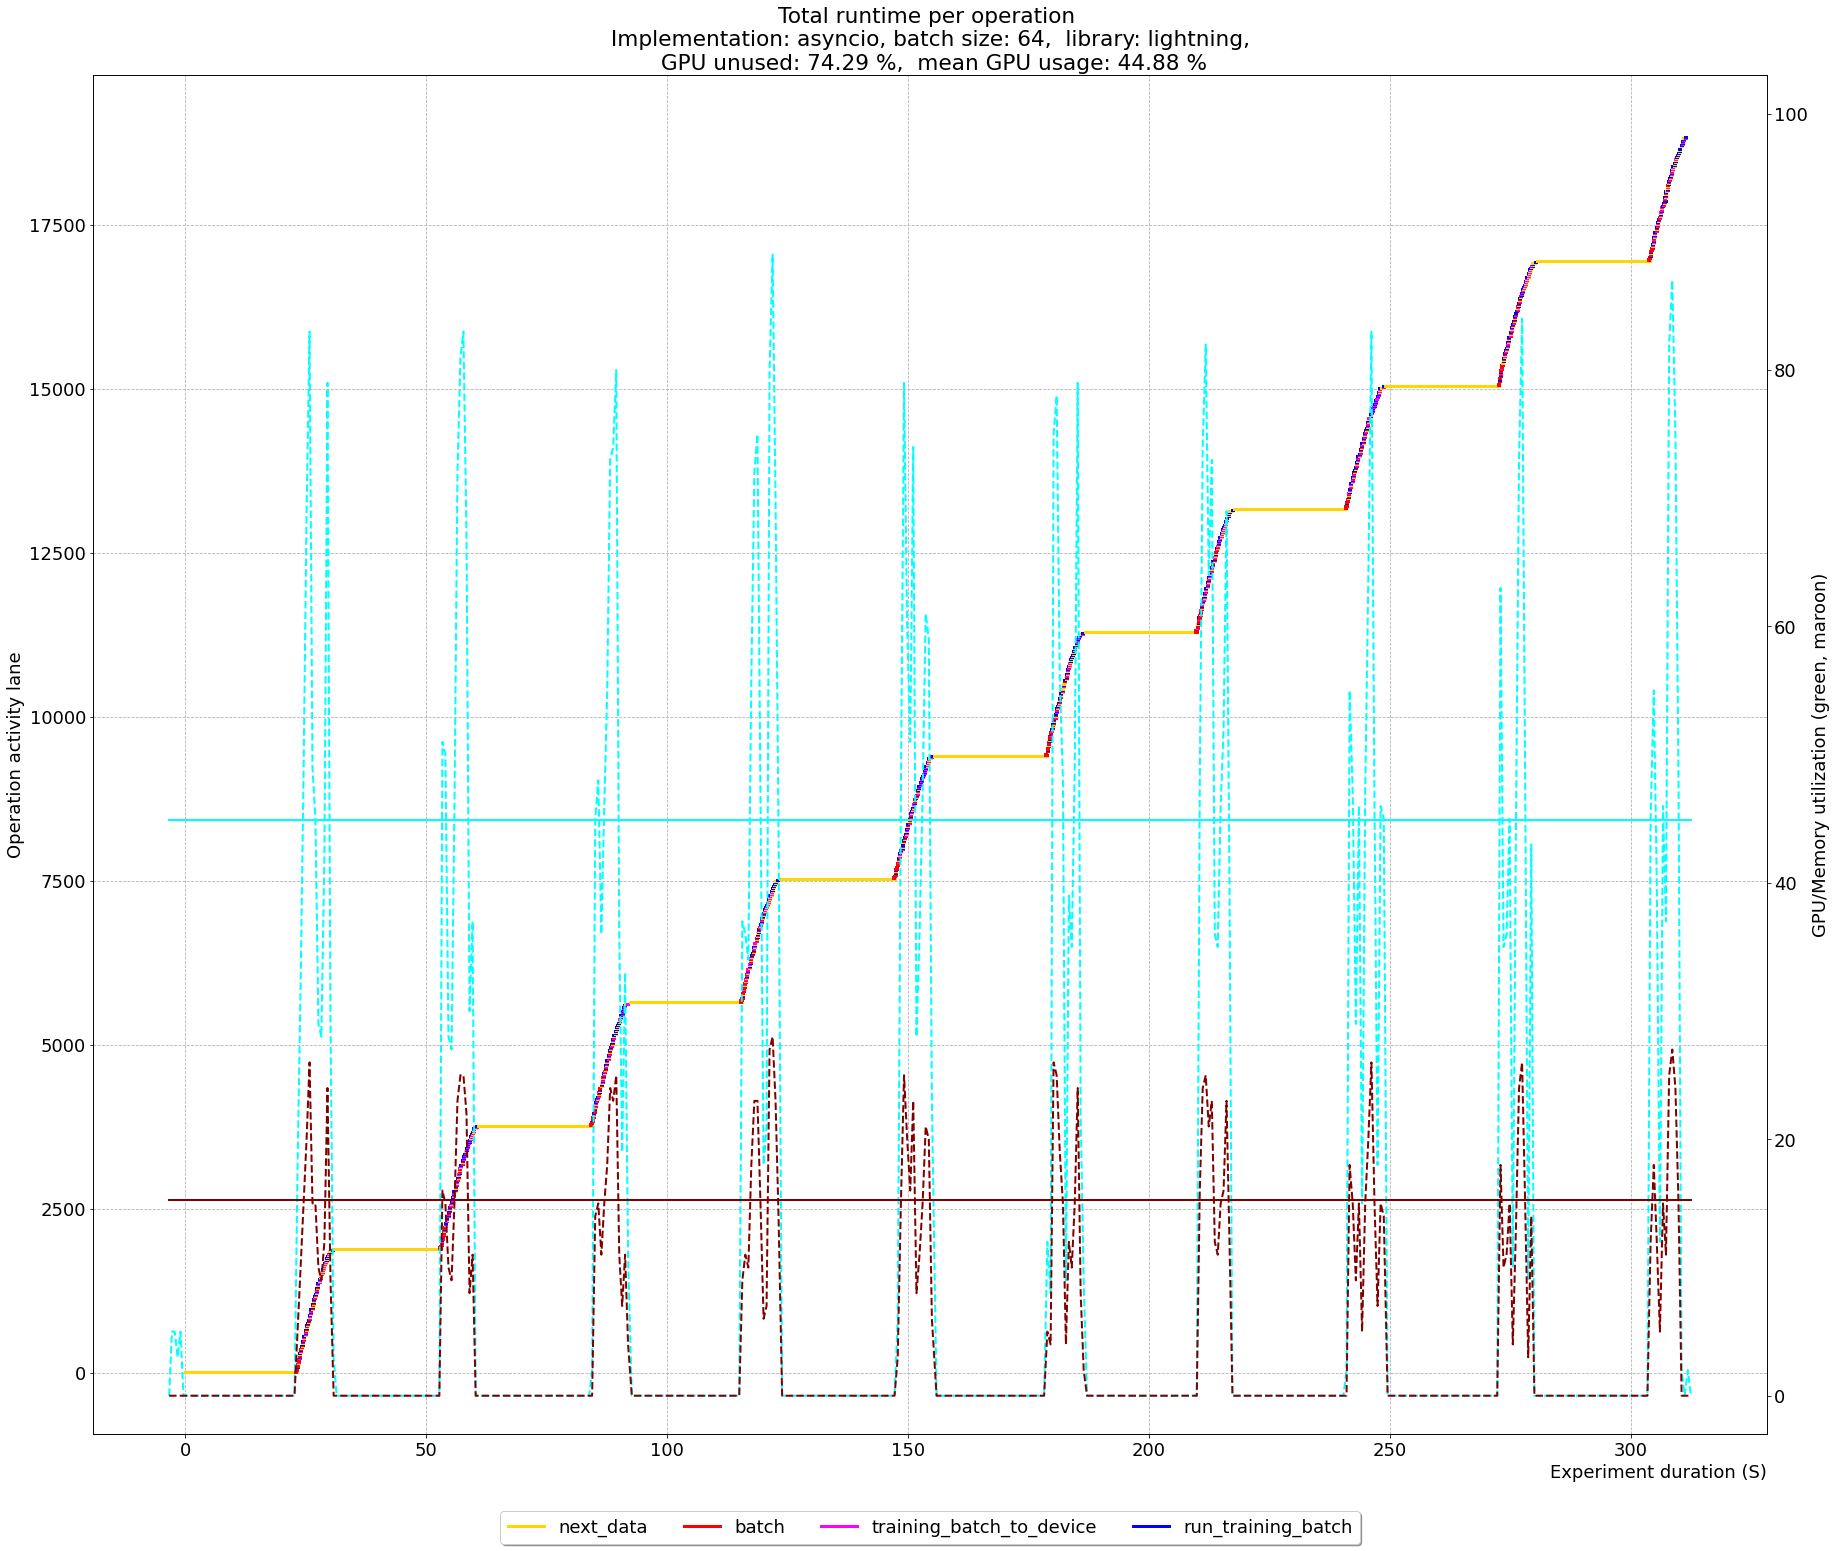

50.813559322033896 30.61111111111111


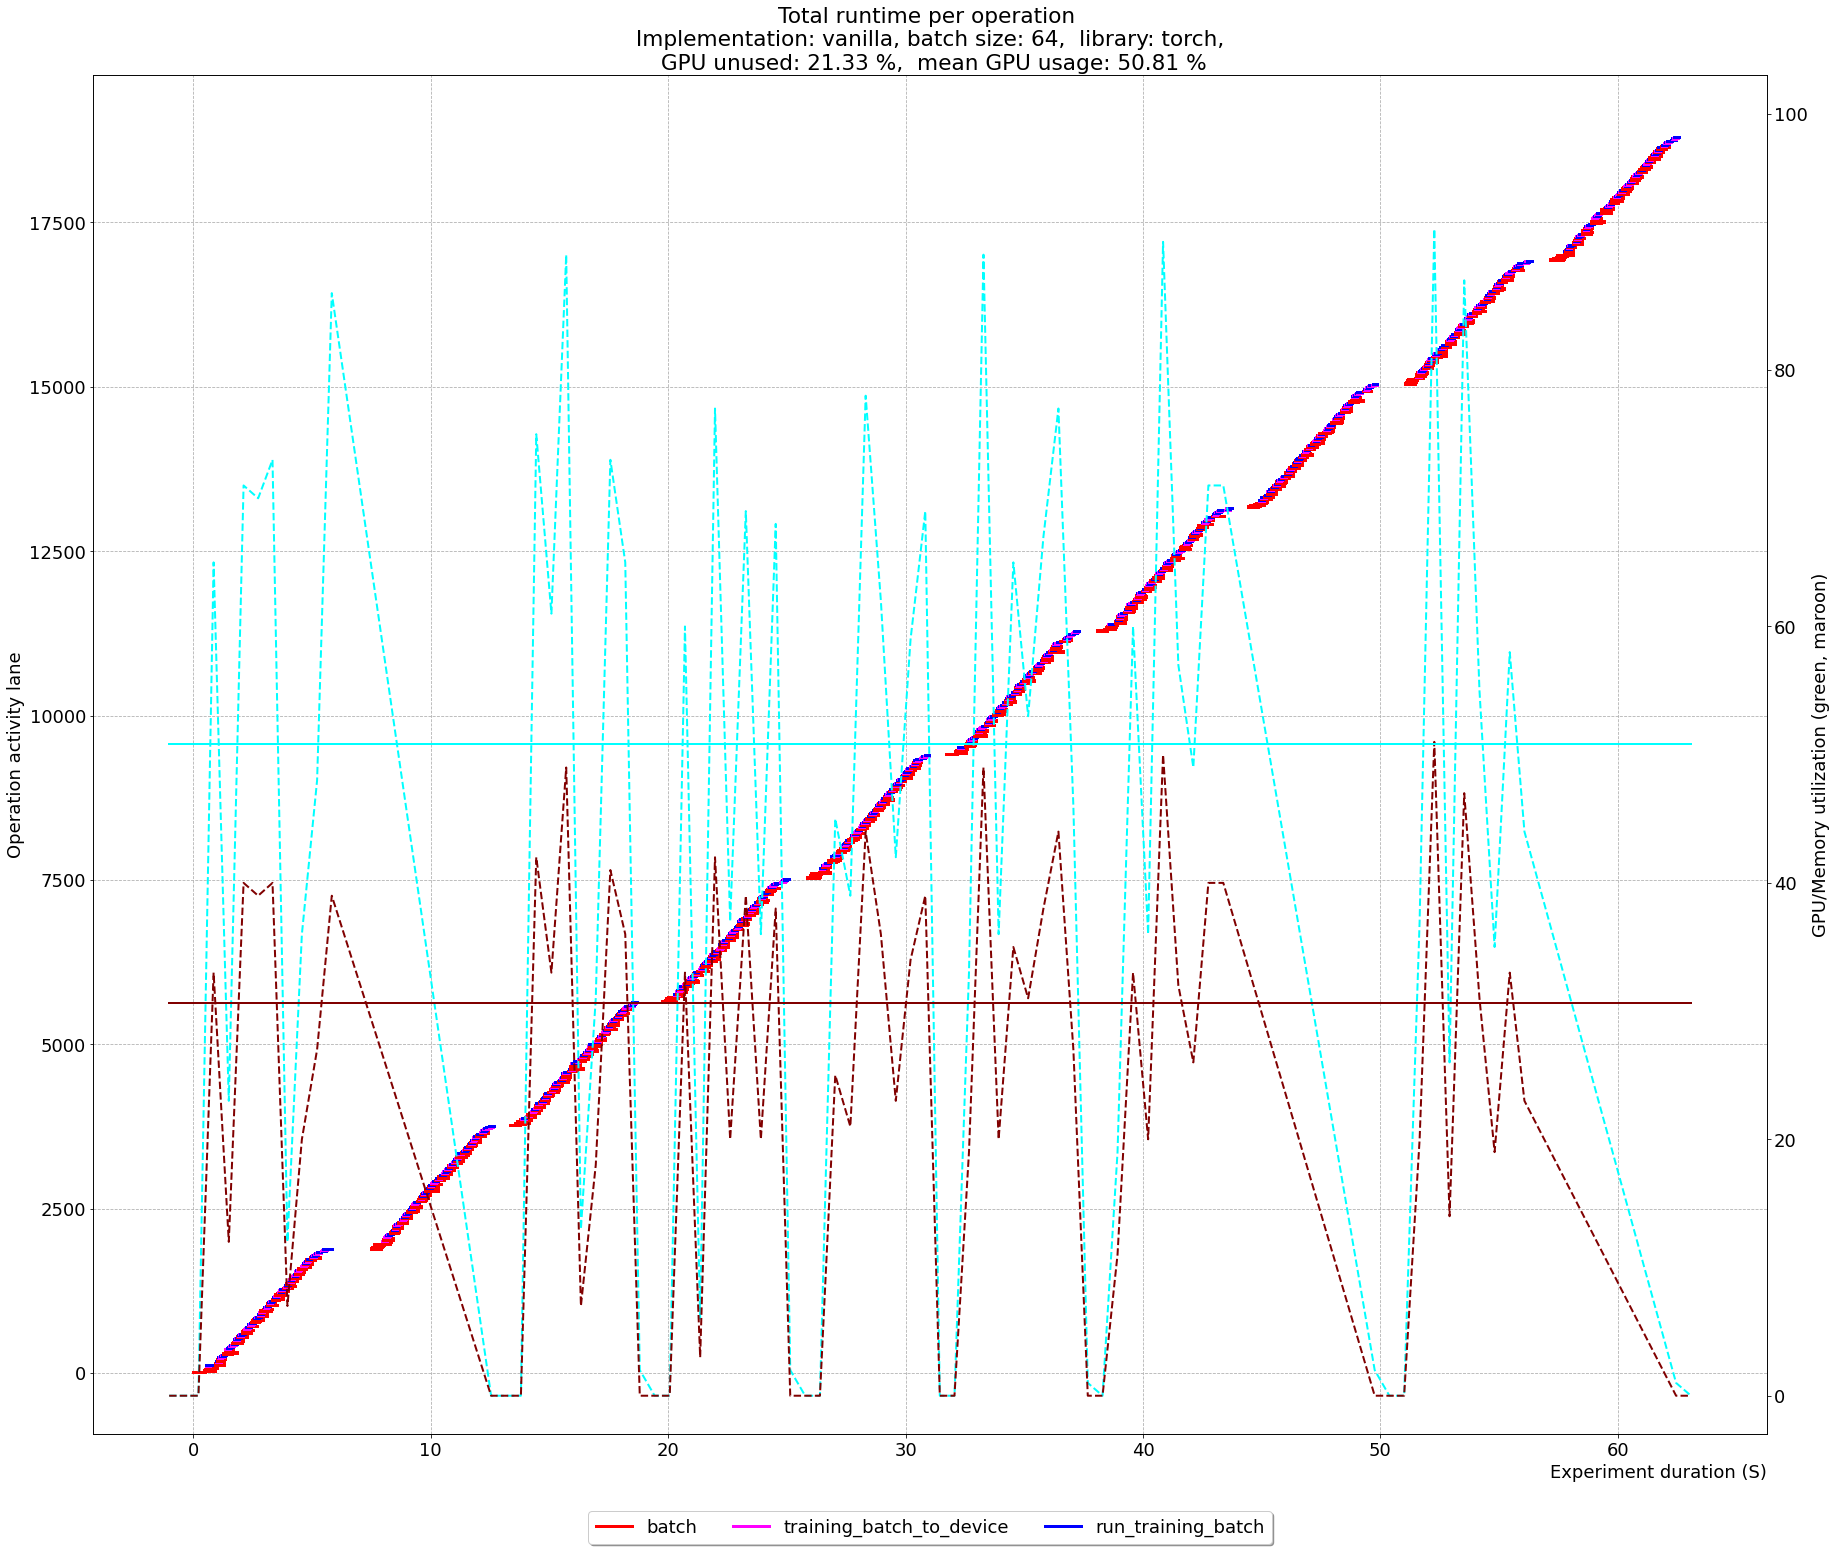

28.682051282051283 10.357142857142858


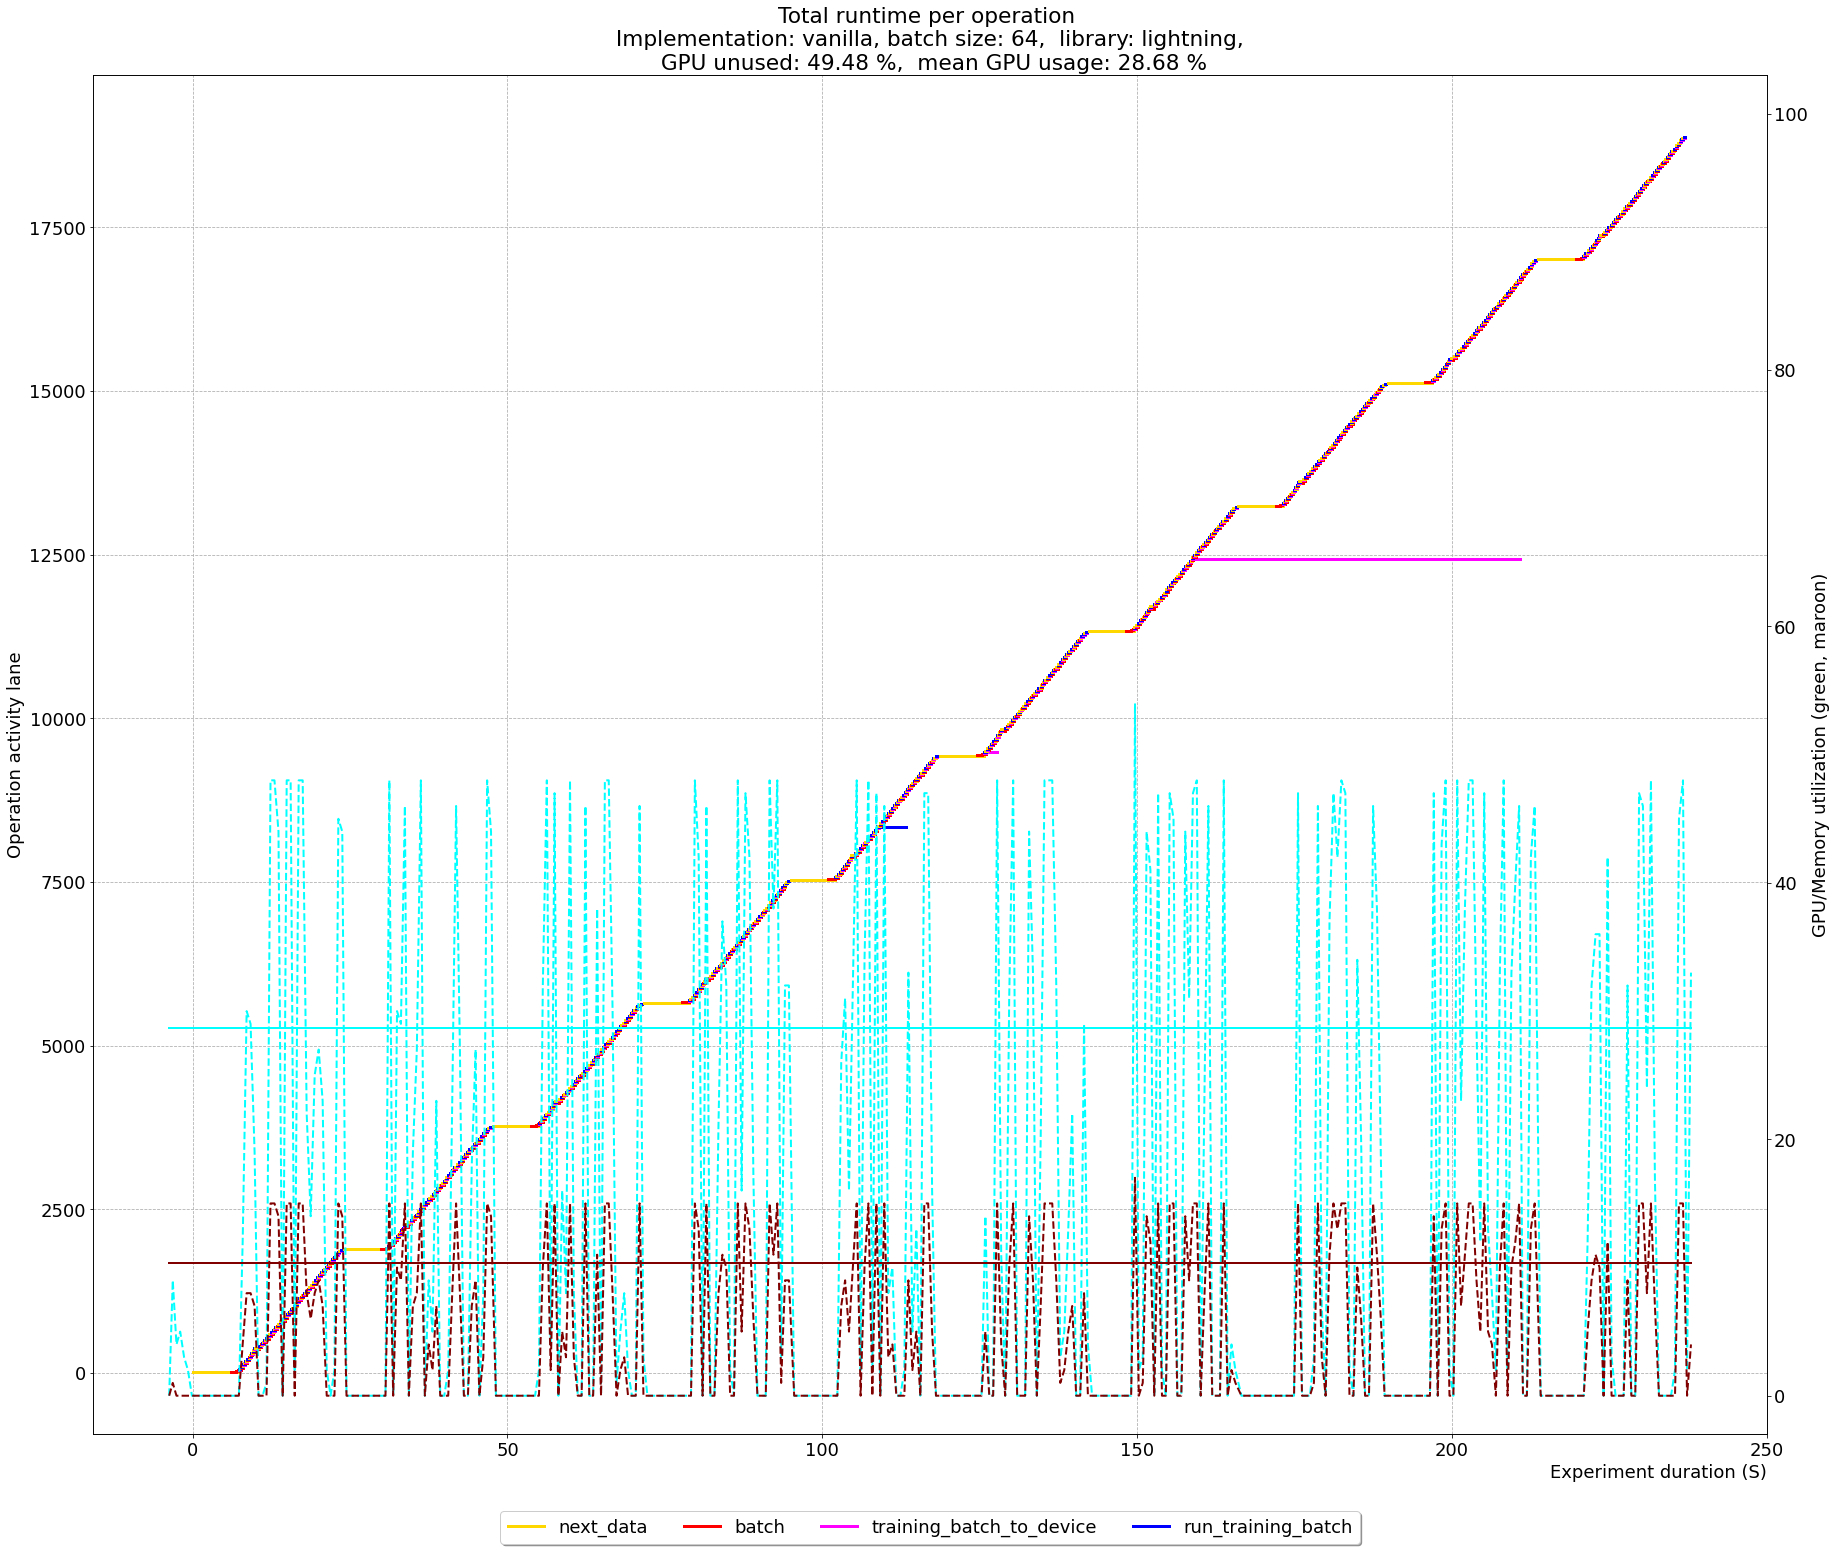

In [41]:
returns_scratch = []
for run in sorted(unique_runs_scratch):
    df = df_dataloader_scratch[df_dataloader_scratch["run"]==run]
    dfgpu = df_gpuutil_scratch[df_gpuutil_scratch["run"]==run]
    returns_scratch.append(show_timelines_with_gpu(df, dfgpu, run, False, True, False, 1))

In [32]:
results = pd.DataFrame.from_records(data=returns_s3)
samples = 3000
results["throughput"] = 3000 / results["runtime"]
results.sort_values(["runtime", "library"], ascending=True)

runtime  gpu_util_zero  gpu_util_mean_no_zeros  mem_util_mean  \
2   227.241910      75.783476               36.270588       5.176638   
4   272.509452      82.388060               44.169492       4.367164   
0   297.539659      79.157895               45.141414       5.309474   
3   431.668852      78.273810               39.678082       2.741071   
1   436.889108      80.412371               42.037594       2.606775   
5  3648.227165      96.358251               29.679426       0.332985   

   mem_util_mean_no_zeros implementation    library  throughput  
2               24.554054        asyncio      torch   13.201790  
4               25.666667        vanilla      torch   11.008792  
0               28.337079       threaded      torch   10.082690  
3               13.544118        asyncio  lightning    6.949772  
1               14.750000       threaded  lightning    6.866731  
5               10.329730        vanilla  lightning    0.822317

In [33]:
results = pd.DataFrame.from_records(data=returns_scratch)
results["throughput"] = samples / results["runtime"]
results.sort_values(["runtime", "library"], ascending=True)

runtime  gpu_util_zero  gpu_util_mean_no_zeros  mem_util_mean  \
2   50.868543      20.481928               63.409091      28.301205   
4   62.389921      21.333333               50.813559      22.040000   
0   93.802143      55.333333               61.522388      14.593333   
5  237.013317      49.481865               28.682051       4.507772   
3  311.498159      74.285714               44.880952       3.636735   
1  315.063369      76.257545               47.474576       3.567404   

   mem_util_mean_no_zeros implementation    library  throughput  
2               37.285714        asyncio      torch   58.975544  
4               30.611111        vanilla      torch   48.084690  
0               34.203125       threaded      torch   31.982212  
5               10.357143        vanilla  lightning   12.657517  
3               15.230769        asyncio  lightning    9.630876  
1               16.266055       threaded  lightning    9.521894